**Intelligent Forecasting for Crop Production in Canada**

$$ Introduction $$

Agriculture plays a crucial role in Canada's economy, but it faces numerous challenges, including unpredictable market demands, changing consumer preferences, and the impacts of climate change. This project seeks to develop a machine learning-based crop production forecasting model using historical data to help stakeholders make informed decisions regarding resource allocation, production planning, and market strategies. The model will focus on key crops like Canola, wheat, barley, flaxseed, and oats, using data sourced from agricultural databases, government reports, and weather statistics as cited in my report.

To predict crop yields, the model will incorporate a variety of features such as temperature, precipitation, farm area, fertilizer consumption, agricultural employment, market prices, and vegetation greenness index. By leveraging AI and data analytics, this forecasting model aims to provide actionable insights that can enhance food security, promote sustainable farming practices, and improve decision-making for farmers, policymakers, and distributors in Canada.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score as sklearn_r2_score, mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


In [4]:
# Specify the path to your Excel file
file_path = r'C:\Users\hp\OneDrive - Saskatchewan Polytechnic\Desktop\Sask Poly\Semester 1.2\MidSem Report.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

data.head(5)

,YEAR,Farm Land( sq km),"employment in Agric, % of total employment",population,total Precipitation,Min temperature,Max temperature,average temperature,Fertlizer,patent application non res,...,barley.production,Flaxseed( dollars per metric tonne),flaxeseed.seed,flaxseed.production,Canola (including rapeseed)( dollars per metric tonne),seed requirement,canola.prodction,Lentils( dollars per metric tonne),lentils seed req,lentils production
0,2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,...,NaN,201.515000,NaN,NaN,233.605000,NaN,NaN,363.916667,NaN,NaN
1,2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,...,10845.6,265.327500,NaN,715.0,280.780833,NaN,5017.1,301.250000,NaN,NaN
2,2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,...,10845.6,342.855000,29.6,715.0,353.843333,27.9,5017.1,356.666667,NaN,NaN
3,2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,...,7467.7,336.719167,31.7,679.4,346.510000,34.1,4520.5,452.500000,NaN,NaN
4,2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,...,12164.2,377.854167,29.7,754.4,342.473333,37.6,6771.2,426.833333,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 32 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   YEAR                                                                           25 non-null     int64  
 1   Farm Land( sq km)                                                              22 non-null     float64
 2   employment in Agric, % of total employment                                     24 non-null     float64
 3   population                                                                     24 non-null     float64
 4   total Precipitation                                                            25 non-null     object 
 5   Min temperature                                                                25 non-null     float64
 6   Max temperature             

$$ Data Preprocessing $$

In [7]:
# Rename the columns
data.columns = [
    'Year', 'Farm_Area', 'Agric_Employment_Rate','Population', 'Precipitation', 
    'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons', 
    'Nonres_Pat_App', 'Res_Pat_App', 'Soil_Index', 
    'Veg_Greeness_Rate', 'Green_Ind', 'Wheat_Price', 
    'Wheat_Seed', 'Wheat_Prod', 'Oats_Price', 'Oats_Seed', 
    'Oats_Prod', 'Barley_Price', 'Barley_Seed', 'Barley_Prod', 
    'Flax_Price', 'Flax_Seed', 'Flax_Prod', 
    'Canola_Price', 'Canola_Seed', 'Canola_Prod', 
    'Lentils_Price', 'Lentils_Seed', 'Lentils_Prod'
]

# Display the first few rows of the updated dataset
data.head()

,Year,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,...,Barley_Prod,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod
0,2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,...,NaN,201.515000,NaN,NaN,233.605000,NaN,NaN,363.916667,NaN,NaN
1,2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,...,10845.6,265.327500,NaN,715.0,280.780833,NaN,5017.1,301.250000,NaN,NaN
2,2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,...,10845.6,342.855000,29.6,715.0,353.843333,27.9,5017.1,356.666667,NaN,NaN
3,2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,...,7467.7,336.719167,31.7,679.4,346.510000,34.1,4520.5,452.500000,NaN,NaN
4,2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,...,12164.2,377.854167,29.7,754.4,342.473333,37.6,6771.2,426.833333,NaN,NaN


In [8]:
# Check if the column 'Soil_Index' exists and is empty
if 'Soil_Index' in data.columns and data['Soil_Index'].isnull().all():
    # Drop the empty column
    data = data.drop(columns=['Soil_Index'])

# Optionally, you can print the DataFrame to verify the column has been removed
data.head()

,Year,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,...,Barley_Prod,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod
0,2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,...,NaN,201.515000,NaN,NaN,233.605000,NaN,NaN,363.916667,NaN,NaN
1,2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,...,10845.6,265.327500,NaN,715.0,280.780833,NaN,5017.1,301.250000,NaN,NaN
2,2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,...,10845.6,342.855000,29.6,715.0,353.843333,27.9,5017.1,356.666667,NaN,NaN
3,2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,...,7467.7,336.719167,31.7,679.4,346.510000,34.1,4520.5,452.500000,NaN,NaN
4,2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,...,12164.2,377.854167,29.7,754.4,342.473333,37.6,6771.2,426.833333,NaN,NaN


IterativeImputer method

The IterativeImputer method performs a multivariate imputation. This means it uses all the available features (columns) to predict the missing values in a feature (column) with missing data. Here's a simplified flow of how the imputation happens:

The imputer models each column (feature) with missing values as a function of the other columns. It uses other features to predict the missing values.

For each missing value in a feature, it predicts the value based on a regression model, considering the other features.

The imputation process is iterative, meaning it repeats the imputation process multiple times to improve the estimates, refining the predicted missing values at each iteration.

This process ensures that the missing values are filled in a way that is consistent with the relationships between features in the dataset.

Advantages of IterativeImputer:
More Accurate
Iterative Process
Handles Multiple Missing Values:

In [11]:
# Initialize the Iterative Imputer
imputer = IterativeImputer(random_state=0)

# Fit the imputer on the data and transform it
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check for any remaining NaN values
data.isnull().sum()

Year                     0
Farm_Area                0
Agric_Employment_Rate    0
Population               0
Precipitation            0
Min_Temp                 0
Max_Temp                 0
Ave_Temp                 0
Fertlizer_Cons           0
Nonres_Pat_App           0
Res_Pat_App              0
Veg_Greeness_Rate        0
Green_Ind                0
Wheat_Price              0
Wheat_Seed               0
Wheat_Prod               0
Oats_Price               0
Oats_Seed                0
Oats_Prod                0
Barley_Price             0
Barley_Seed              0
Barley_Prod              0
Flax_Price               0
Flax_Seed                0
Flax_Prod                0
Canola_Price             0
Canola_Seed              0
Canola_Prod              0
Lentils_Price            0
Lentils_Seed             0
Lentils_Prod             0
dtype: int64

In [12]:
# Check for duplicates
duplicates = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Display the number of duplicate rows
print(f'Number of duplicate rows: {num_duplicates}')

# Optionally, to see the duplicate rows themselves:
duplicate_rows = data[duplicates]
print('Duplicate rows:')
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Year, Farm_Area, Agric_Employment_Rate, Population, Precipitation, Min_Temp, Max_Temp, Ave_Temp, Fertlizer_Cons, Nonres_Pat_App, Res_Pat_App, Veg_Greeness_Rate, Green_Ind, Wheat_Price, Wheat_Seed, Wheat_Prod, Oats_Price, Oats_Seed, Oats_Prod, Barley_Price, Barley_Seed, Barley_Prod, Flax_Price, Flax_Seed, Flax_Prod, Canola_Price, Canola_Seed, Canola_Prod, Lentils_Price, Lentils_Seed, Lentils_Prod]
Index: []

[0 rows x 31 columns]


In [13]:
data['Year'] = data['Year'].astype(int)

# Now set 'Year' as the index
data.set_index('Year', inplace=True)

# Display the updated DataFrame
print("\nUpdated DataFrame with 'Year' as index:")
data.head(5)


Updated DataFrame with 'Year' as index:


,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,Res_Pat_App,...,Barley_Prod,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod
Year,,,,,,,,,,,,,,,,,,,,,
2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,4187.0,...,10364.729096,201.515000,31.038438,813.49607,233.605000,36.698483,5917.291739,363.916667,44.391345,580.177192
2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,3963.0,...,10845.600000,265.327500,31.241273,715.00000,280.780833,34.798516,5017.100000,301.250000,44.435824,533.463402
2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,3959.0,...,10845.600000,342.855000,29.600000,715.00000,353.843333,27.900000,5017.100000,356.666667,52.581900,613.145093
2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,3929.0,...,7467.700000,336.719167,31.700000,679.40000,346.510000,34.100000,4520.500000,452.500000,66.191259,625.478338
2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,5231.0,...,12164.200000,377.854167,29.700000,754.40000,342.473333,37.600000,6771.200000,426.833333,63.503027,858.966085


In [14]:
# In this project, we have chosen to work with 4 crops, Oats, Canola, Flaxseed and Lentils
# Define the columns to drop
columns_to_drop = [
    'Wheat_Price', 'Wheat_Seed', 'Wheat_Prod',  # Wheat-related columns
    'Barley_Price', 'Barley_Seed', 'Barley_Prod'  # Barley-related columns
]

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Display the updated DataFrame
data.head()

,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,Res_Pat_App,...,Oats_Prod,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod
Year,,,,,,,,,,,,,,,,,,,,,
2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,4187.0,...,2982.73785,201.515000,31.038438,813.49607,233.605000,36.698483,5917.291739,363.916667,44.391345,580.177192
2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,3963.0,...,2690.70000,265.327500,31.241273,715.00000,280.780833,34.798516,5017.100000,301.250000,44.435824,533.463402
2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,3959.0,...,2690.70000,342.855000,29.600000,715.00000,353.843333,27.900000,5017.100000,356.666667,52.581900,613.145093
2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,3929.0,...,2910.70000,336.719167,31.700000,679.40000,346.510000,34.100000,4520.500000,452.500000,66.191259,625.478338
2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,5231.0,...,3376.70000,377.854167,29.700000,754.40000,342.473333,37.600000,6771.200000,426.833333,63.503027,858.966085


$$ EDA $$

In [16]:
# List of output columns
output_columns = ['Oats_Prod', 'Flax_Prod', 'Canola_Prod', 'Lentils_Prod']

# Calculate the correlation matrix for all variables
correlation_matrix = data.corr()

# Extract correlations with respect to the output columns
output_correlations = correlation_matrix[output_columns]

output_correlations

,Oats_Prod,Flax_Prod,Canola_Prod,Lentils_Prod
Farm_Area,-0.336250,0.470669,-0.868557,-0.784036
Agric_Employment_Rate,-0.313725,0.582673,-0.836082,-0.759751
Population,0.409690,-0.512027,0.899510,0.832905
Precipitation,-0.143961,0.304718,-0.217164,-0.258505
Min_Temp,-0.070195,0.290861,-0.092629,-0.012070
Max_Temp,0.240537,-0.165112,0.013052,0.027602
Ave_Temp,-0.093505,0.123744,0.073453,0.227992
Fertlizer_Cons,0.367283,-0.581088,0.876212,0.823335
Nonres_Pat_App,-0.051332,0.490941,-0.703458,-0.700163
Res_Pat_App,0.276048,0.137090,-0.186831,-0.258510


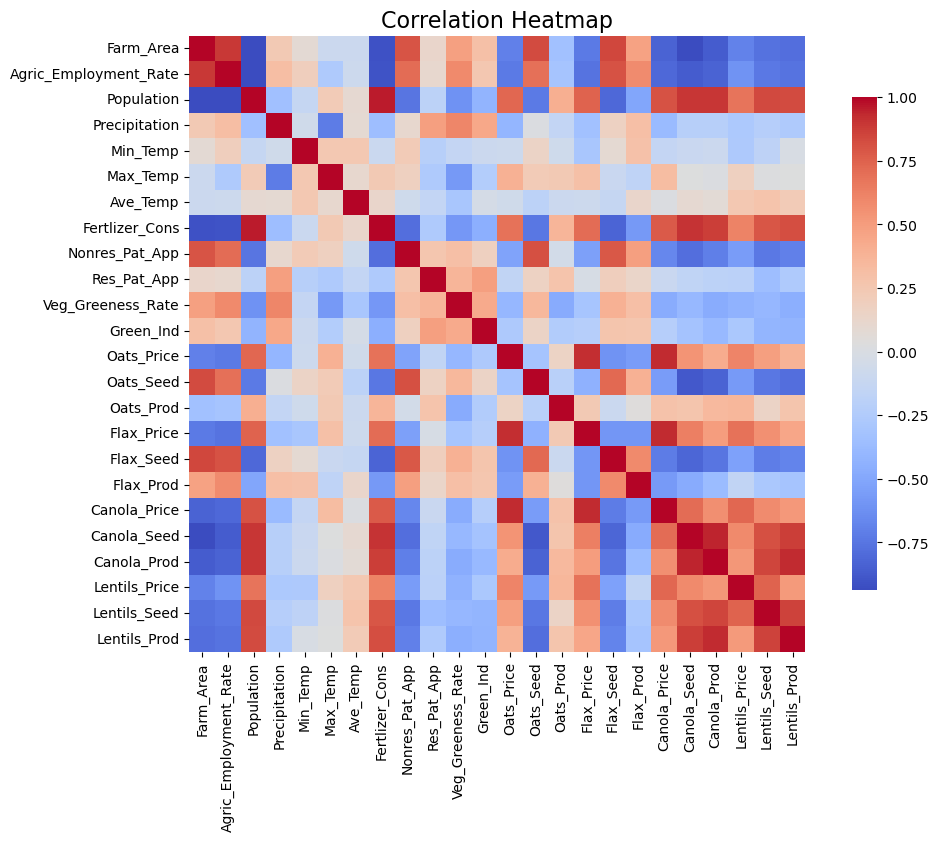

In [17]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

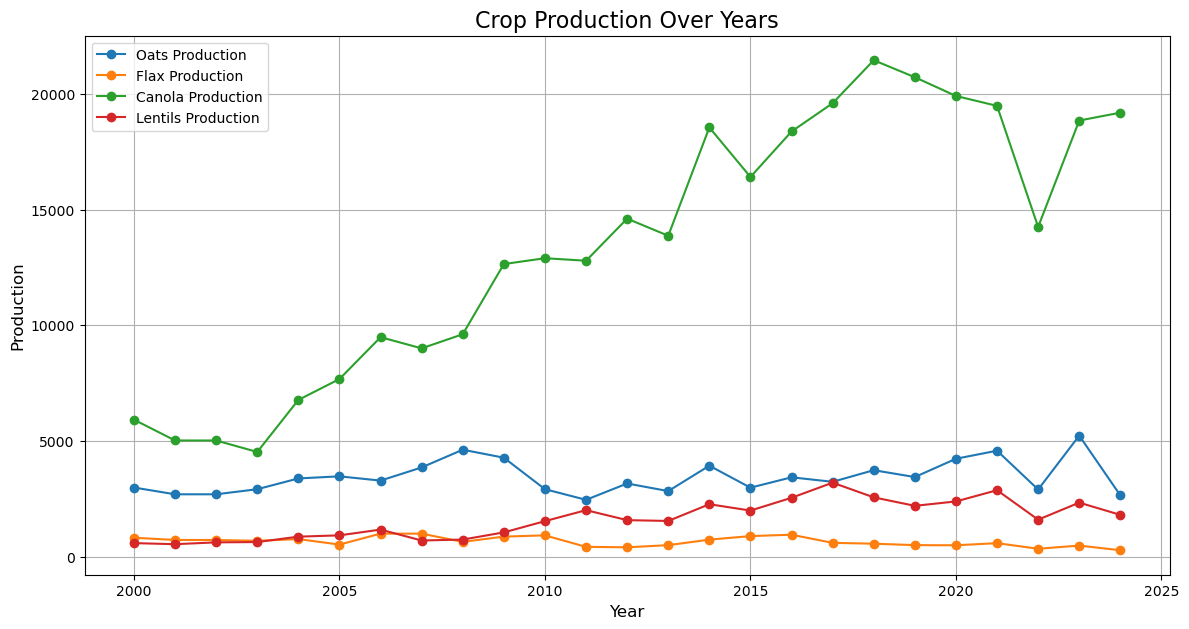

In [18]:
plt.figure(figsize=(14, 7))

# Plotting each crop's production using the index for the x-axis)
plt.plot(data.index, data['Oats_Prod'], label='Oats Production', marker='o')
plt.plot(data.index, data['Flax_Prod'], label='Flax Production', marker='o')
plt.plot(data.index, data['Canola_Prod'], label='Canola Production', marker='o')
plt.plot(data.index, data['Lentils_Prod'], label='Lentils Production', marker='o')

# Adding titles and labels
plt.title('Crop Production Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.legend()
plt.grid()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


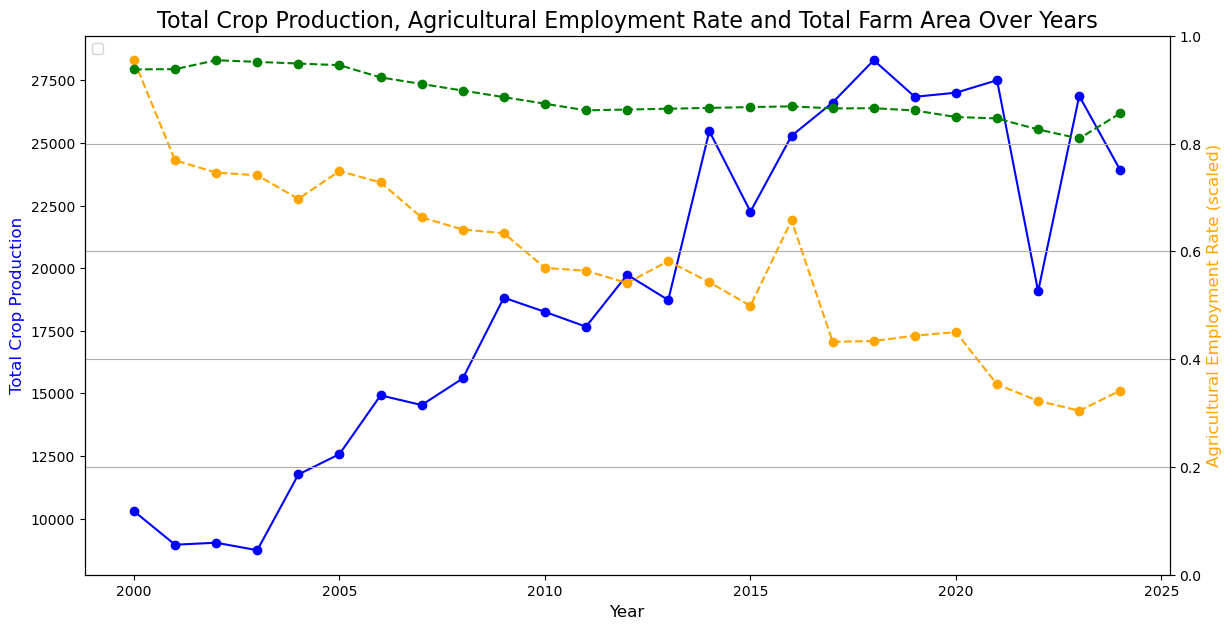

In [19]:
# Calculate the sum of all crop productions
data['Total_Prod'] = data['Oats_Prod']+ data['Flax_Prod'] + data['Canola_Prod'] + data['Lentils_Prod']

plt.figure(figsize=(14, 7))

# Plotting total crop production using the index for the x-axis
plt.plot(data.index, data['Total_Prod'], marker='o', color='blue', label='Total Crop Production')

# Adding an imaginary axis for employment rate
employment_rate_scaled = data['Agric_Employment_Rate'] * (data['Total_Prod'].max() / data['Agric_Employment_Rate'].max())
plt.plot(data.index, employment_rate_scaled, marker='o', color='orange', linestyle='--', label='Employment Rate (scaled)')

# Optionally, adding farm area with scaling
farm_area_scaled = data['Farm_Area'] * (data['Total_Prod'].max() / data['Farm_Area'].max())
plt.plot(data.index, farm_area_scaled, marker='o', color='green', linestyle='--', label='Farm Area (scaled)')

# Adding titles and labels
plt.title('Total Crop Production, Agricultural Employment Rate and Total Farm Area Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crop Production', fontsize=12, color='blue')

# Create a second y-axis for the employment rate label
ax2 = plt.gca().twinx()  
ax2.set_ylabel('Agricultural Employment Rate (scaled)', fontsize=12, color='orange')

# Adding grid and legend
plt.grid()
plt.legend(loc='upper left')

# Show the plot
plt.show()

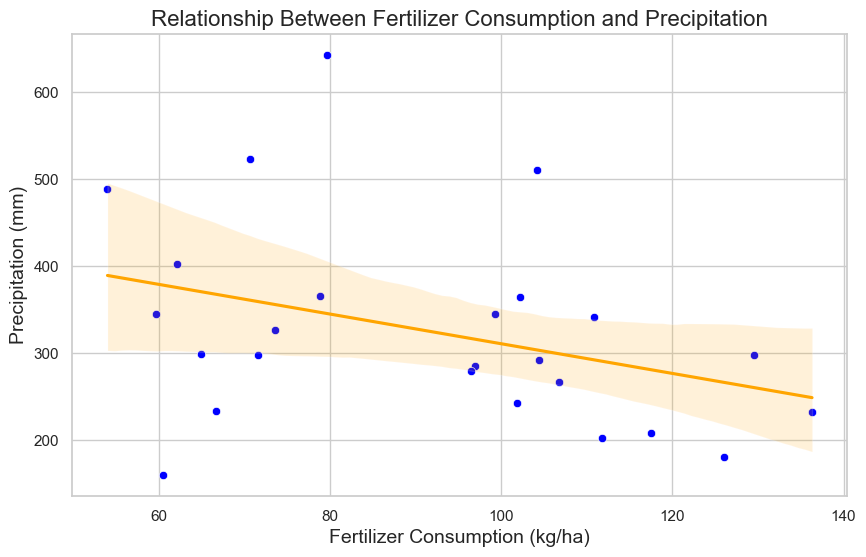

In [20]:
# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=data, x='Fertlizer_Cons', y='Precipitation', color='blue')

# Add a trend line
sns.regplot(data=data, x='Fertlizer_Cons', y='Precipitation', scatter=False, color='orange')

# Set the title and labels
plt.title('Relationship Between Fertilizer Consumption and Precipitation', fontsize=16)
plt.xlabel('Fertilizer Consumption (kg/ha)', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)

# Show the plot
plt.show()

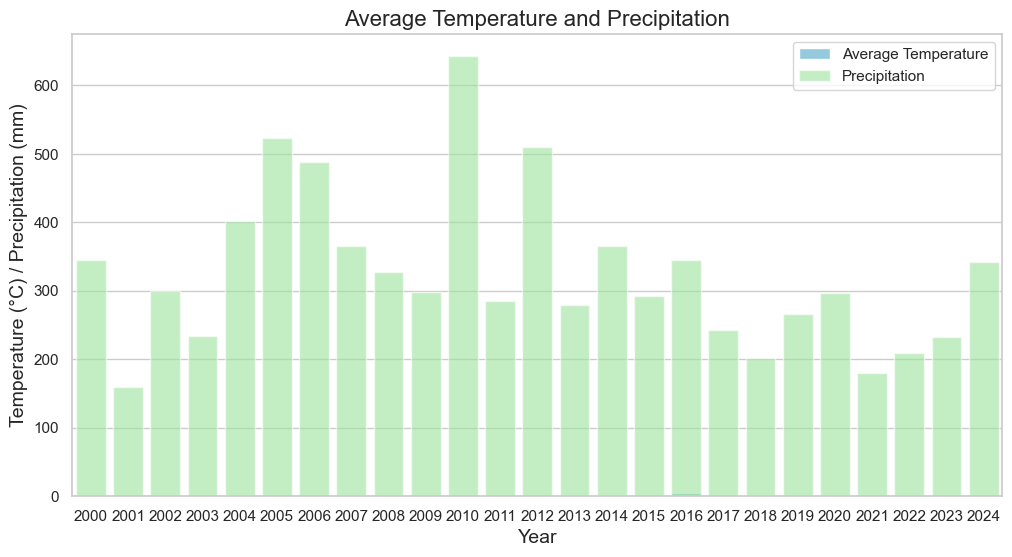

In [21]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for average temperature and precipitation
sns.barplot(data=data, x=data.index, y='Ave_Temp', color='skyblue', ax=ax, label='Average Temperature')
sns.barplot(data=data, x=data.index, y='Precipitation', color='lightgreen', ax=ax, label='Precipitation', alpha=0.6)

# Set titles and labels
ax.set_title('Average Temperature and Precipitation', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature (°C) / Precipitation (mm)', fontsize=14)

# Show the plot
plt.show()

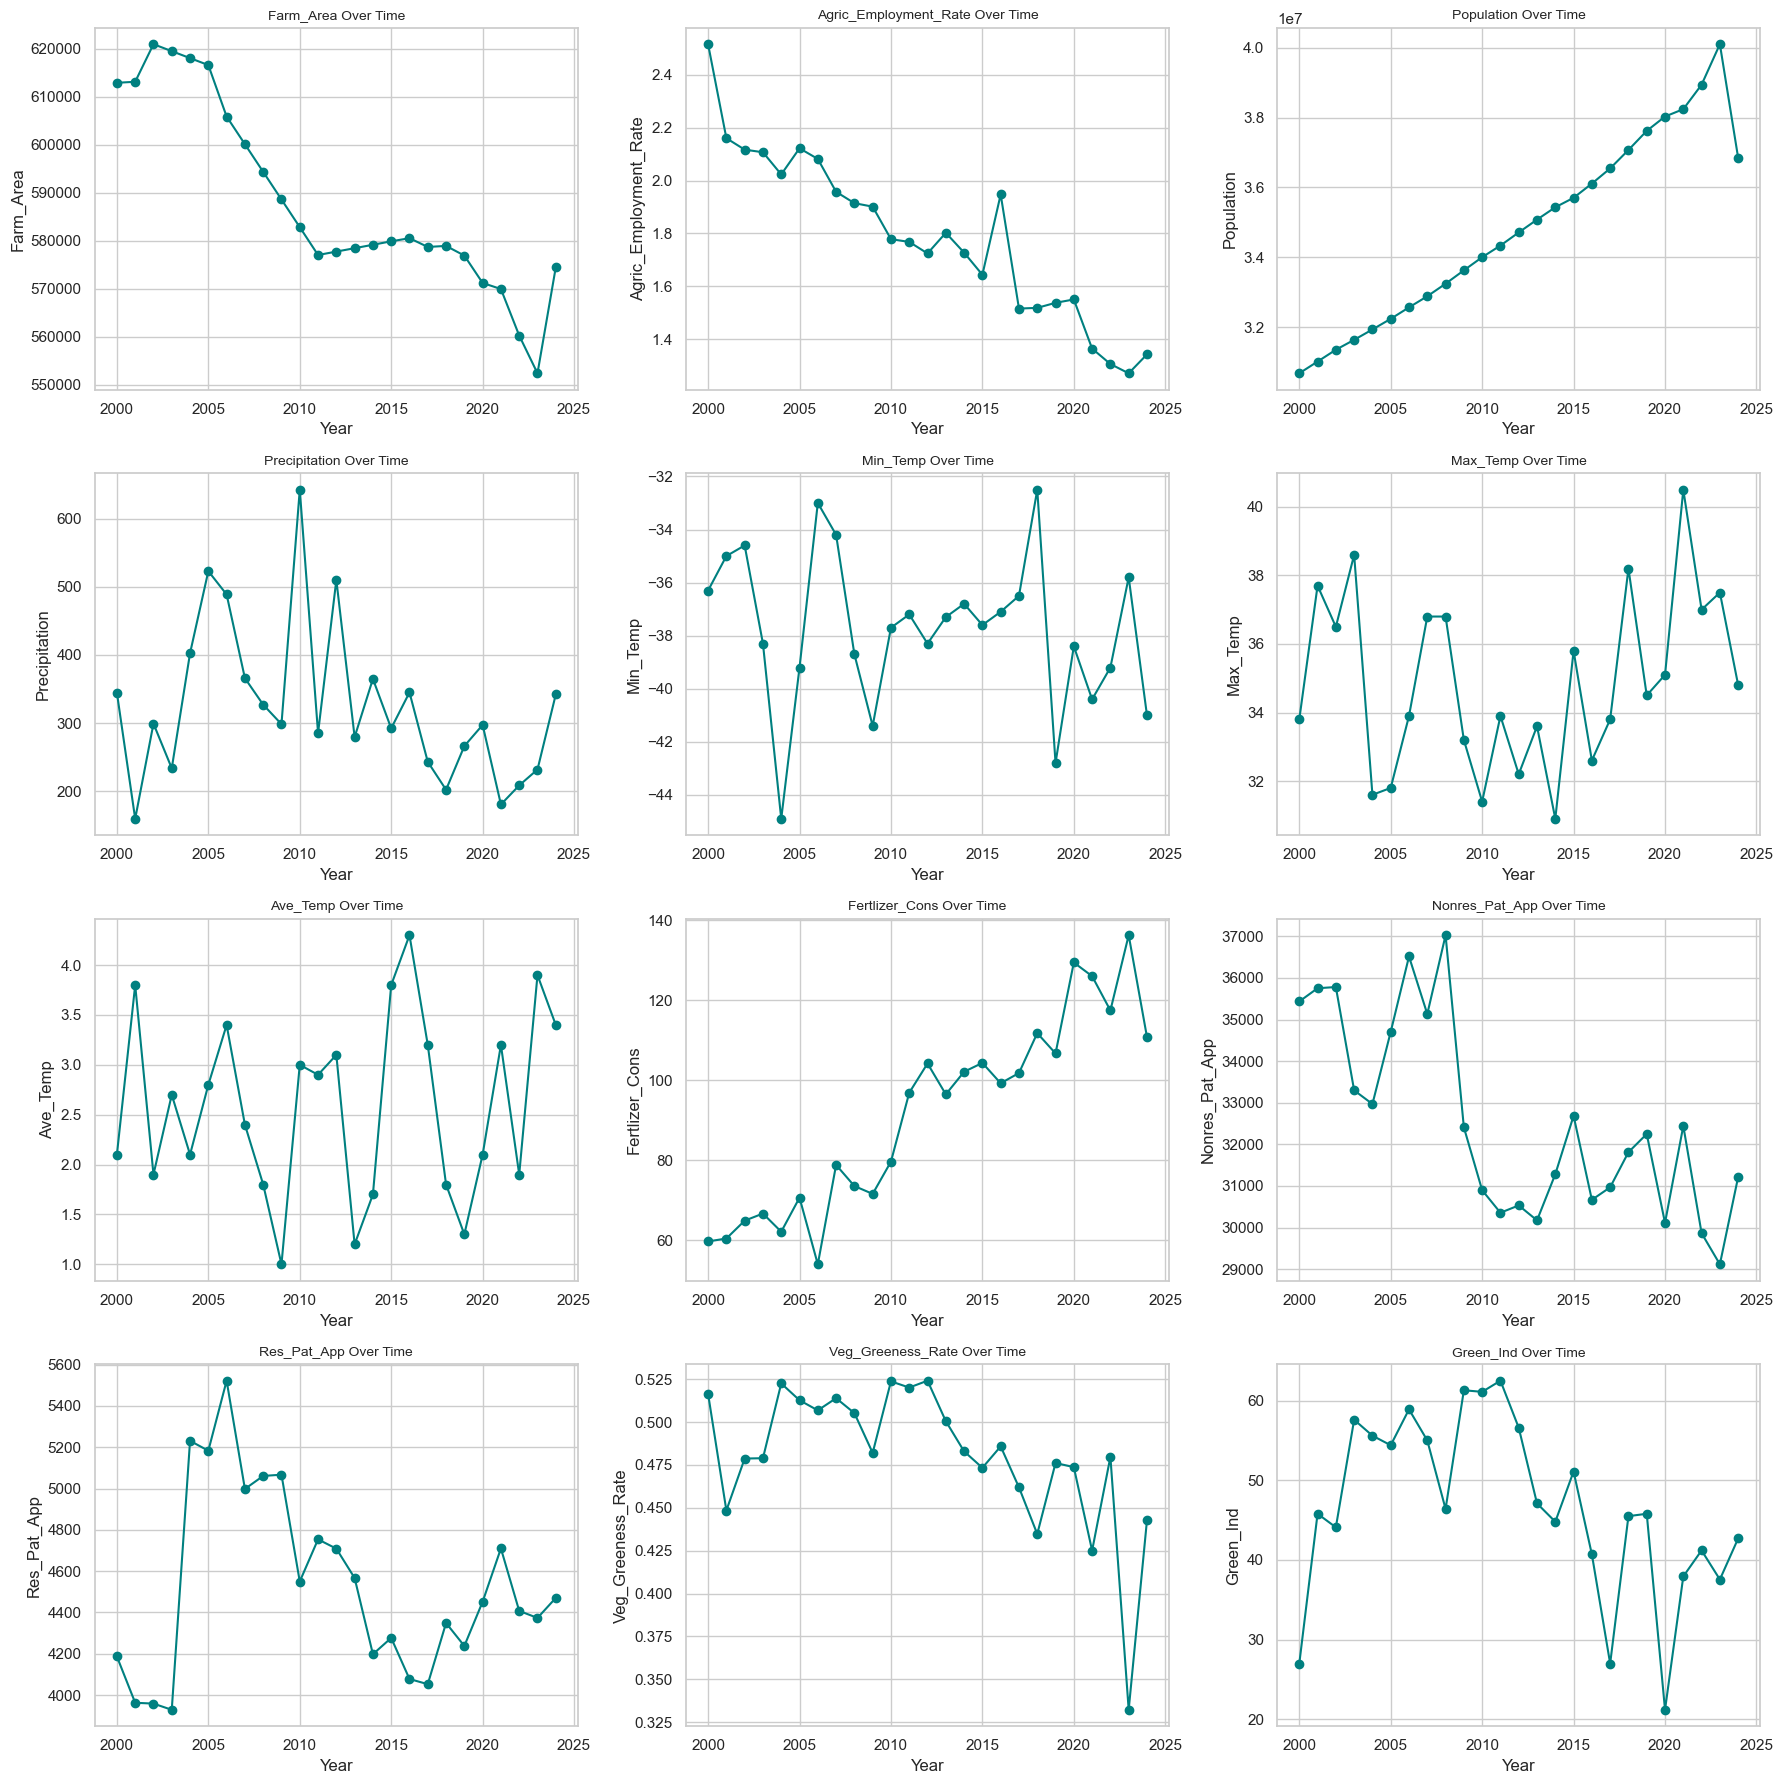

In [22]:
# Features to plot
features = [
    'Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
    'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons', 'Nonres_Pat_App',
    'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'
]


# Plot
plt.figure(figsize=(18, 18))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    plt.plot(data.index, data[feature], marker='o', linestyle='-', color='teal')
    plt.title(f'{feature} Over Time', fontsize=10)
    plt.xlabel('Year')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

$$ Feature Generation $$

Growing Degree Days (GDD)

Taking Growing Degree Days (GDD) as a feature in this analysis can be beneficial for several reasons:

Plant Growth Prediction: Quantifies heat accumulation related to growth and development of crops.
Climate Resilience: Helps understand the impact of climate change on temperature patterns and agricultural practices.
Yield Estimation: Correlates with potential crop yields, aiding in yield predictions.
Agronomic Decision-Making: Informs timing for planting and harvesting, as well as irrigation and fertilization strategies.
Risk Assessment: Assesses the risk of crop failure due to inadequate or excessive heat accumulation.
Integration with Other Variables: Combines with other features for comprehensive models of agricultural ecosystems.

In [26]:
data['GDD'] = (data['Max_Temp'] + data['Min_Temp']) / 2 - 5  # Base temp=5°C

 Precipitation Deficit 

 The goal is to determine how much the total precipitation recorded at each entry deviates from the average precipitation over the dataset. This helps assess whether there is a surplus or deficit of precipitation.
 

The new column Precipitation_Deficit provides insights into moisture availability:
Negative values signal potential drought conditions or insufficient moisture for crops.
Positive values indicate favorable moisture conditions that can support agricultural activities.
This feature is crucial for understanding water stress in agricultural systems and making informed decisions regarding irrigation and crop management.

In [29]:
Precipitation_mean = data['Precipitation'].mean()
Precipitation_mean

325.456

In [30]:
data['Precipitation_Deficit'] = data['Precipitation'] - Precipitation_mean

Fertilizer Effectiveness

 Fertilizer Effectiveness based on the interaction between fertilizer application and total precipitation. The new column Fertilizer_Effectiveness provides a measure of how well the fertilizer is likely to perform under varying precipitation conditions:
Higher values indicate a potentially greater effect of fertilizer when sufficient precipitation is present.
It helps understand the relationship between nutrient availability and water supply, which is crucial for optimizing fertilization strategies.

In [33]:
data['Fertilizer_Effectiveness'] = data['Fertlizer_Cons'] * data['Precipitation']

temporal lag features for crop production

The aim is to create lagged features for crop production, which can help in time series analysis. Lag features are useful for capturing trends and patterns over time. This is particularly useful in agricultural modeling, as it helps capture the effects of previous seasons' yields on current outcomes, allowing for better predictions and insights into trends over time.

In [36]:
crops = ['Oats', 'Flax', 'Canola', 'Lentils']
for crop in crops:
    data[f'{crop}_Prod_lag1'] = data[f'{crop}_Prod'].shift(1)

Target Transformation (Log for skewed yields)

Purpose of the Transformation
Normalization: The main purpose of applying a logarithmic transformation is to reduce skewness in the data. Many statistical models assume that the data follows a normal distribution, and transforming skewed data can help meet this assumption.
Stabilizing Variance: Log transformations can stabilize the variance of the data, making it more homoscedastic (i.e., having constant variance).

In [39]:
crops = ['Oats', 'Flax', 'Canola', 'Lentils']
for crop in crops:
    data[f'log_{crop}_Prod'] = np.log1p(data[f'{crop}_Prod'])

In [40]:
# Check for any remaining NaN values
data.isnull().sum()

Farm_Area                   0
Agric_Employment_Rate       0
Population                  0
Precipitation               0
Min_Temp                    0
Max_Temp                    0
Ave_Temp                    0
Fertlizer_Cons              0
Nonres_Pat_App              0
Res_Pat_App                 0
Veg_Greeness_Rate           0
Green_Ind                   0
Oats_Price                  0
Oats_Seed                   0
Oats_Prod                   0
Flax_Price                  0
Flax_Seed                   0
Flax_Prod                   0
Canola_Price                0
Canola_Seed                 0
Canola_Prod                 0
Lentils_Price               0
Lentils_Seed                0
Lentils_Prod                0
Total_Prod                  0
GDD                         0
Precipitation_Deficit       0
Fertilizer_Effectiveness    0
Oats_Prod_lag1              1
Flax_Prod_lag1              1
Canola_Prod_lag1            1
Lentils_Prod_lag1           1
log_Oats_Prod               0
log_Flax_P

In [41]:
data = data.drop(index=2000)

In [42]:
data.head()

,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,Res_Pat_App,...,Precipitation_Deficit,Fertilizer_Effectiveness,Oats_Prod_lag1,Flax_Prod_lag1,Canola_Prod_lag1,Lentils_Prod_lag1,log_Oats_Prod,log_Flax_Prod,log_Canola_Prod,log_Lentils_Prod
Year,,,,,,,,,,,,,,,,,,,,,
2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,3963.0,...,-165.756,9649.217679,2982.73785,813.49607,5917.291739,580.177192,7.897928,6.573680,8.520807,6.281263
2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,3959.0,...,-26.156,19419.289968,2690.70000,715.00000,5017.100000,533.463402,7.897928,6.573680,8.520807,6.420231
2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,3929.0,...,-91.656,15586.906570,2690.70000,715.00000,5017.100000,613.145093,7.976492,6.522681,8.416599,6.440114
2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,5231.0,...,77.144,25006.832500,2910.70000,679.40000,4520.500000,625.478338,8.124950,6.627247,8.820581,6.756893
2005,616560.000,2.122050,32242732.0,523.0,-39.2,31.8,2.8,70.638176,34705.0,5183.0,...,197.544,36943.766304,3376.70000,754.40000,6771.200000,858.966085,8.151391,6.249782,8.945671,6.820889


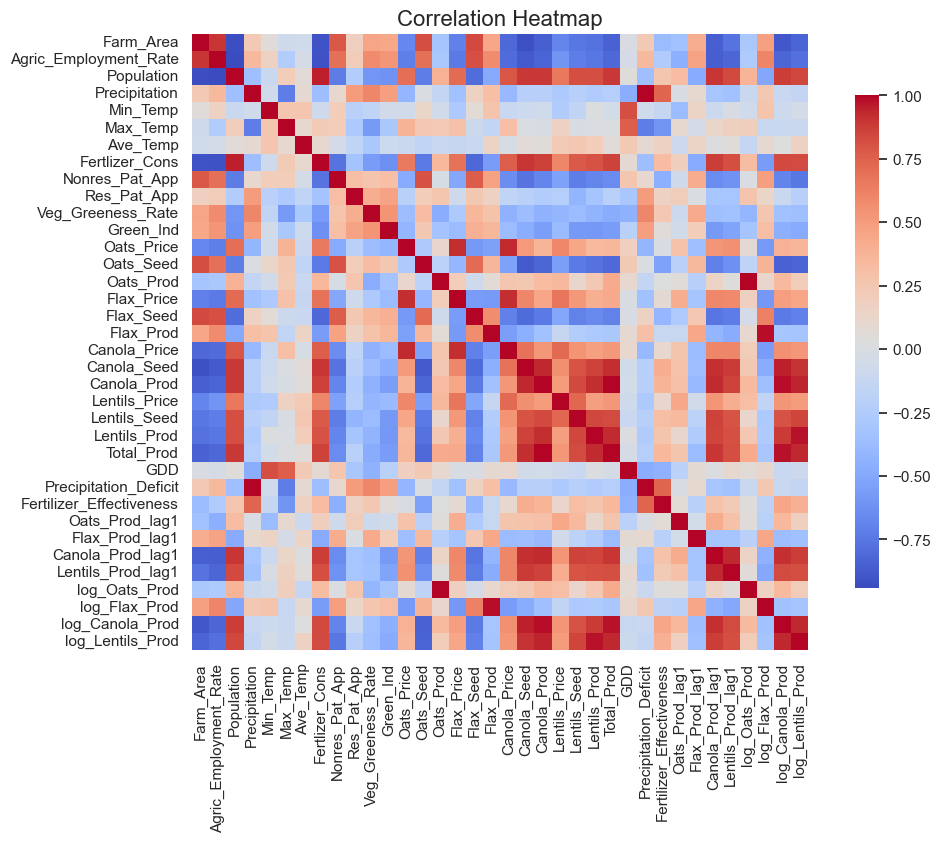

In [43]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [44]:
data.columns

Index(['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
       'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons', 'Nonres_Pat_App',
       'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind', 'Oats_Price',
       'Oats_Seed', 'Oats_Prod', 'Flax_Price', 'Flax_Seed', 'Flax_Prod',
       'Canola_Price', 'Canola_Seed', 'Canola_Prod', 'Lentils_Price',
       'Lentils_Seed', 'Lentils_Prod', 'Total_Prod', 'GDD',
       'Precipitation_Deficit', 'Fertilizer_Effectiveness', 'Oats_Prod_lag1',
       'Flax_Prod_lag1', 'Canola_Prod_lag1', 'Lentils_Prod_lag1',
       'log_Oats_Prod', 'log_Flax_Prod', 'log_Canola_Prod',
       'log_Lentils_Prod'],
      dtype='object')

$$ Modeling $$

In [46]:
# Define crops information including all the variables
crops_info = {
    'Oats': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind',
                     'GDD', 'Precipitation_Deficit', 'Fertilizer_Effectiveness'],
        'target': 'Oats_Prod',
        'seed_var': 'Oats_Seed',
        'price_var': 'Oats_Price',
        'lag_var': 'Oats_Prod_lag1',
        'log_var': 'log_Oats_Prod'
    },
    'Flax': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind',
                     'GDD', 'Precipitation_Deficit', 'Fertilizer_Effectiveness'],
        'target': 'Flax_Prod',
        'seed_var': 'Flax_Seed',
        'price_var': 'Flax_Price',
        'lag_var': 'Flax_Prod_lag1',
        'log_var': 'log_Flax_Prod'
    },
    'Canola': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind',
                     'GDD', 'Precipitation_Deficit', 'Fertilizer_Effectiveness'],
        'target': 'Canola_Prod',
        'seed_var': 'Canola_Seed',
        'price_var': 'Canola_Price',
        'lag_var': 'Canola_Prod_lag1',
        'log_var': 'log_Canola_Prod'
    },
    'Lentils': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind',
                     'GDD', 'Precipitation_Deficit', 'Fertilizer_Effectiveness'],
        'target': 'Lentils_Prod',
        'seed_var': 'Lentils_Seed',
        'price_var': 'Lentils_Price',
        'lag_var': 'Lentils_Prod_lag1',
        'log_var': 'log_Lentils_Prod'
    }
}

In [47]:
# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (19, 36)
Testing set shape: (5, 36)


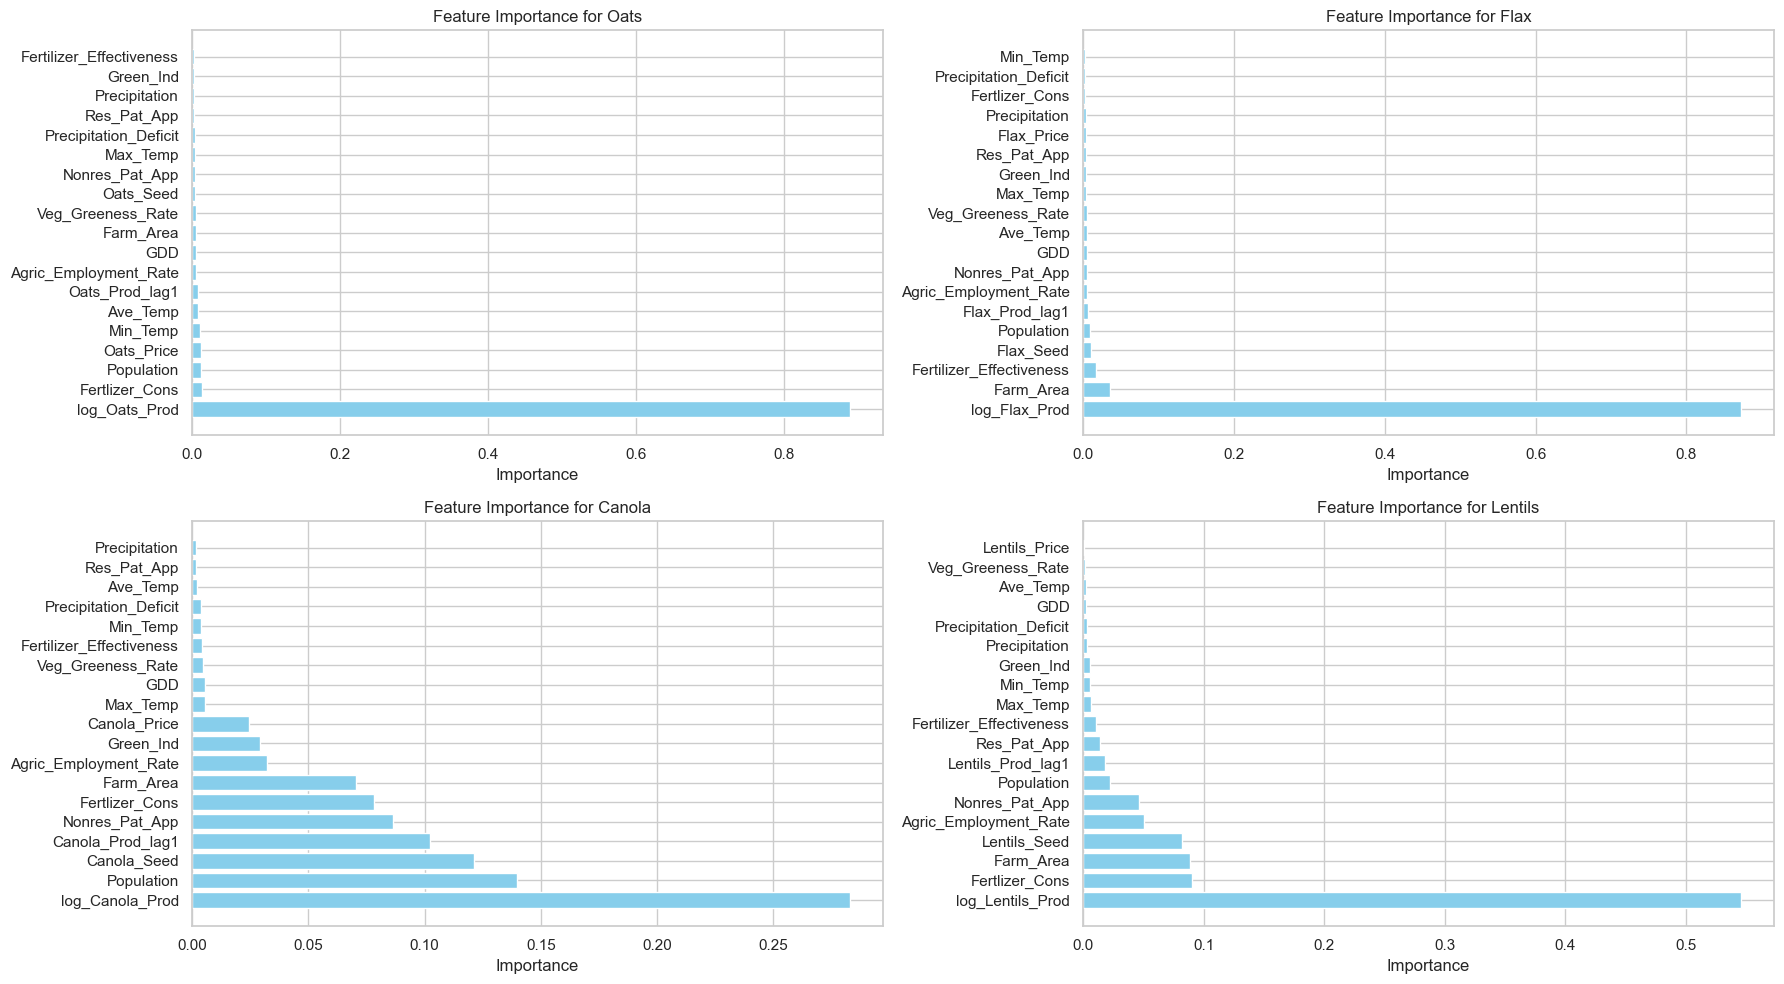

Top 7 features for Oats:
           Feature  Importance
18   log_Oats_Prod    0.889956
7   Fertlizer_Cons    0.013042
2       Population    0.011856
16      Oats_Price    0.011813
4         Min_Temp    0.011088
6         Ave_Temp    0.008350
17  Oats_Prod_lag1    0.007352

Top 7 features for Flax:
                     Feature  Importance
18             log_Flax_Prod    0.872700
0                  Farm_Area    0.035936
14  Fertilizer_Effectiveness    0.016733
15                 Flax_Seed    0.010541
2                 Population    0.008366
17            Flax_Prod_lag1    0.006241
1      Agric_Employment_Rate    0.005600

Top 7 features for Canola:
             Feature  Importance
18   log_Canola_Prod    0.283061
2         Population    0.139713
15       Canola_Seed    0.121121
17  Canola_Prod_lag1    0.102313
8     Nonres_Pat_App    0.086334
7     Fertlizer_Cons    0.078414
0          Farm_Area    0.070684

Top 7 features for Lentils:
                  Feature  Importance
18       log_L

In [48]:
# Function to plot feature importance and return top features
def plot_feature_importance(crop_name, features, target, seed_var, price_var, lag_var, log_var, ax):
    # Combine features with additional variables
    selected_features = features + [seed_var, price_var, lag_var, log_var]
    X = data[selected_features]
    y = data[target]

    # Fit Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Get feature importances
    importances = model.feature_importances_
    
    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plotting
    ax.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    ax.set_xlabel('Importance')
    ax.set_title(f'Feature Importance for {crop_name}')

    # Return top 7 features
    return importance_df.head(7)

# Create subplots to plot two graphs in a row
fig, axs = plt.subplots(2, 2, figsize=(18, 10))  

# Initialize a dictionary to hold top features for each crop
top_features_dict = {}

# Loop through all crops and plot feature importance
crop_names = list(crops_info.keys())
for i, crop in enumerate(crop_names):
    ax = axs[i // 2, i % 2]  # Determine the correct subplot (2x2 grid)
    top_features = plot_feature_importance(
        crop,
        crops_info[crop]['features'],
        crops_info[crop]['target'],
        crops_info[crop]['seed_var'],
        crops_info[crop]['price_var'],
        crops_info[crop]['lag_var'],
        crops_info[crop]['log_var'],
        ax
    )
    # Store top features in dictionary
    top_features_dict[crop] = top_features

plt.tight_layout()
plt.show()

# Print top 7 features for each crop
for crop, features in top_features_dict.items():
    print(f'Top 7 features for {crop}:')
    print(features)
    print()  # Add a newline for better readability

**LINEAR REGRESSION**

   Why Linear Regression?
Simplicity and Interpretability:
Linear regression is straightforward to interpret. It estimates the relationship between the input features and the target variable by fitting a linear equation, making it intuitive to understand how changes in the features affect the target.
Efficiency:
Linear regression is computationally efficient, making it suitable for large datasets. It requires less computational power than more complex models like SVR or neural networks.
Linear Relationships:
If the relationship between the features and the target variable is approximately linear, linear regression can provide good predictive performance.
Baseline Model:
It serves as a good baseline model against which the performance of more complex algorithms can be compared. If the linear model performs well, there may be no need to use more complicated approaches.
Common in Agriculture:
In agricultural contexts, relationships between factors like area, employment, and production are often linear or can be approximated as linear, making linear regression a suitable choice.

Using linear regression in this context allows for a straightforward analysis of how various factors influence crop production. Later, we will explore more complex models like SVR or random forests. This approach ensures that we start with a model that is easy to understand and interpret before moving on to more sophisticated techniques.

In [50]:
def train_crop_model(train, test, crop_name, features, target, seed_var, price_var, lag_var, log_var):
    # Define features and target variable for training
    X_train = train[features + [seed_var, price_var, lag_var, log_var]]
    y_train = train[target]

    # Define features and target variable for testing
    X_test = test[features + [seed_var, price_var, lag_var, log_var]]
    y_test = test[target]

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

    # Store R^2 score, crop name, and model name in the results
    return {
        'model': 'Linear Regression',
        'crop': crop_name,
        'r2': r2
    }

# Initialize a list to store results
results = []

# Iterate over each crop and train the model using train and test sets
for crop, info in crops_info.items():
    result = train_crop_model(
        train, test, 
        crop, 
        info['features'], 
        info['target'], 
        info['seed_var'], 
        info['price_var'], 
        info['lag_var'],  
        info['log_var']   
    )
    results.append(result)

# Convert the results into a DataFrame
linear_reg = pd.DataFrame(results)

# Display the DataFrame
print(linear_reg)

Model for Oats:
Mean Squared Error: 113622.21178721995
R^2 Score: 0.5773310660228108
Mean Absolute Error (MAE): 237.20127736743353
---
Model for Flax:
Mean Squared Error: 14872.292575307929
R^2 Score: 0.44004775798253126
Mean Absolute Error (MAE): 108.23830369015054
---
Model for Canola:
Mean Squared Error: 3535269.9267665804
R^2 Score: 0.8882025883604528
Mean Absolute Error (MAE): 1828.609967547056
---
Model for Lentils:
Mean Squared Error: 453867.788124337
R^2 Score: 0.46997094409217977
Mean Absolute Error (MAE): 619.5036687400677
---
               model     crop        r2
0  Linear Regression     Oats  0.577331
1  Linear Regression     Flax  0.440048
2  Linear Regression   Canola  0.888203
3  Linear Regression  Lentils  0.469971


In [51]:
# Define crops information with top features and their targets
feature_important_crop_info = {
    'Oats': {
        'target': 'Oats_Prod',
        'top_features': [
            'log_Oats_Prod',
            'Fertlizer_Cons',
            'Population',
            'Oats_Price',
            'Min_Temp',
            'Ave_Temp',
            'Oats_Prod_lag1',
        ]
    },
    'Flax': {
        'target': 'Flax_Prod',
        'top_features': [
            'log_Flax_Prod',
            'Farm_Area',
            'Fertilizer_Effectiveness',
            'Flax_Seed',
            'Population',
            'Flax_Prod_lag1',
            'Agric_Employment_Rate',
        ]
    },
    'Canola': {
        'target': 'Canola_Prod',
        'top_features': [
            'log_Canola_Prod',
            'Population',
            'Canola_Seed',
            'Canola_Prod_lag1',
            'Nonres_Pat_App',
            'Fertlizer_Cons',
            'Farm_Area',
        ]
    },
    'Lentils': {
        'target': 'Lentils_Prod',
        'top_features': [
            'log_Lentils_Prod',
            'Fertlizer_Cons',
            'Farm_Area',
            'Lentils_Seed',
            'Agric_Employment_Rate',
            'Nonres_Pat_App',
            'Population',
        ]
    }
}

In [52]:
def train_important_feature_model(train, test, crop_name, top_features, target):
    # Define features and target variable for training
    X_train = train[top_features]
    y_train = train[target]

    # Define features and target variable for testing
    X_test = test[top_features]
    y_test = test[target]

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

    # Store model name, crop name, and R² score in the results
    return {
        'model': 'Linear Regression',  
        'crop': crop_name,
        'r2': r2
    }

# Initialize a list to store results
important_feature_results = []

# Iterate over each crop and train the model using the most important features
for crop, info in feature_important_crop_info.items():
    result = train_important_feature_model(
        train, 
        test, 
        crop, 
        info['top_features'], 
        info['target']
    )
    important_feature_results.append(result)

# Convert the results into a DataFrame
important_feature_df = pd.DataFrame(important_feature_results)

# Display the DataFrame
print(important_feature_df[['model', 'crop', 'r2']])

Model for Oats:
Mean Squared Error: 7309.254806185188
R^2 Score: 0.9728099384046189
Mean Absolute Error (MAE): 70.7719361692064
---
Model for Flax:
Mean Squared Error: 807.0086020044739
R^2 Score: 0.9696155603628964
Mean Absolute Error (MAE): 25.226272179000443
---
Model for Canola:
Mean Squared Error: 1189234.0651427852
R^2 Score: 0.9623923227728918
Mean Absolute Error (MAE): 904.5720154813422
---
Model for Lentils:
Mean Squared Error: 77735.39353162391
R^2 Score: 0.9092202215661487
Mean Absolute Error (MAE): 209.7309541594553
---
               model     crop        r2
0  Linear Regression     Oats  0.972810
1  Linear Regression     Flax  0.969616
2  Linear Regression   Canola  0.962392
3  Linear Regression  Lentils  0.909220


In [53]:
# Concatenate the two DataFrames vertically
combined_results = pd.concat([linear_reg.assign(model_type='All Features'),
                              important_feature_df.assign(model_type='Important Features')])

# Print the concatenated DataFrame
print(combined_results)


               model     crop        r2          model_type
0  Linear Regression     Oats  0.577331        All Features
1  Linear Regression     Flax  0.440048        All Features
2  Linear Regression   Canola  0.888203        All Features
3  Linear Regression  Lentils  0.469971        All Features
0  Linear Regression     Oats  0.972810  Important Features
1  Linear Regression     Flax  0.969616  Important Features
2  Linear Regression   Canola  0.962392  Important Features
3  Linear Regression  Lentils  0.909220  Important Features


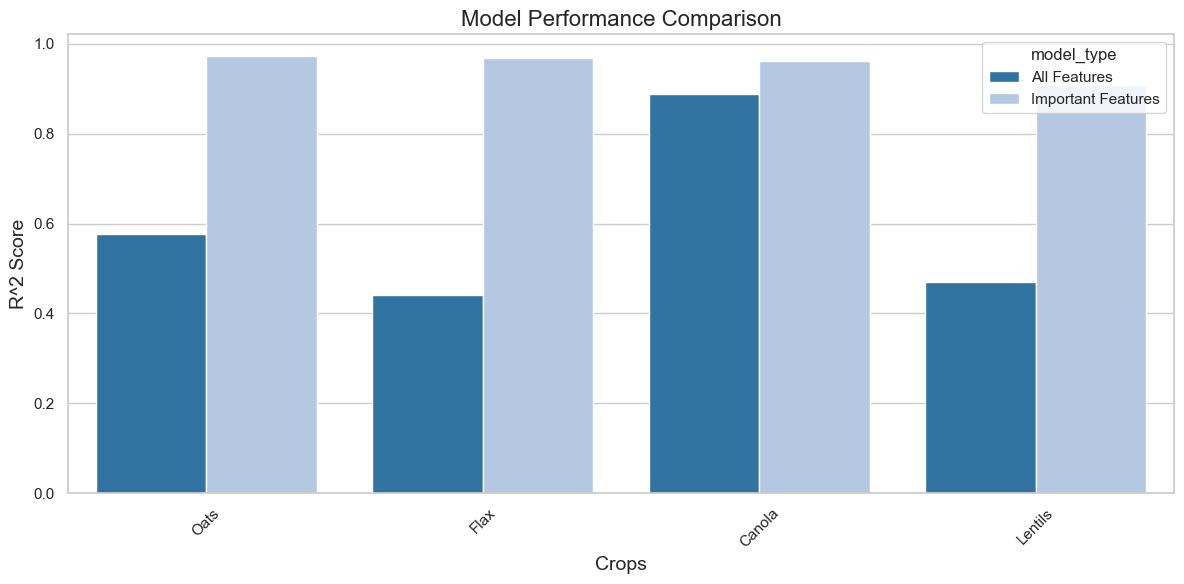

In [54]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define specific colors for the two model types
colors = ['#1f77b4', '#aec7e8']  # Dark blue and light blue

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_results, x='crop', y='r2', hue='model_type', palette=colors)

# Add titles and labels
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Crops', fontsize=14)
plt.ylabel('R^2 Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='model_type')

# Show the plot
plt.tight_layout()
plt.show()

In [55]:
# Define crops information with top features and their targets
feature_important_crop_info = {
    'Oats': {
        'target': 'Oats_Prod',
        'top_features': [
            'log_Oats_Prod',
            'Fertlizer_Cons',
            'Population',
            'Oats_Price',
            'Min_Temp',
            'Ave_Temp',
            'Oats_Prod_lag1',
        ]
    },
    
}

def train_important_feature_model(train, test, crop_name, top_features, target, data):
    # Define features and target variable for training
    X_train = train[top_features]
    y_train = train[target]

    # Define features and target variable for testing
    X_test = test[top_features]
    y_test = test[target]

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

    # Store only R^2 score in the results
    result = {
        'crop': crop_name,
        'r2': r2
    }

    # Make predictions for the entire dataset using the already trained model
    y_pred_all = model.predict(data[top_features])

    # Create a DataFrame to hold actual and predicted values
    results_df = pd.DataFrame({
        'Actual Production': data[target],
        'Predicted Production': y_pred_all
    }, index=data.index)  # Use the existing index (Year)

    # Sort by Year (if needed)
    results_df.sort_index(inplace=True)

    # Reset index if you want 'Year' as a column
    results_df.reset_index(inplace=True)
    results_df.rename(columns={'index': 'Year'}, inplace=True)

    return result, results_df

# Initialize a list to store results and a DataFrame for oats predictions
important_feature_results = []
oats_predictions = None

# Train the model specifically for "Oats"
crop = 'Oats'
info = feature_important_crop_info[crop]

result, predictions_df = train_important_feature_model(
    train, 
    test, 
    crop, 
    info['top_features'], 
    info['target'],
    data  # Pass the entire dataset for predictions
)

important_feature_results.append(result)
oats_predictions = predictions_df  # Retain predictions for oats

# Convert the results into a DataFrame
important_feature_df = pd.DataFrame(important_feature_results)

# Display the DataFrame
print(important_feature_df)

# Print the oats predictions DataFrame
if oats_predictions is not None:
    print(oats_predictions)

Model for Oats:
Mean Squared Error: 7309.254806185188
R^2 Score: 0.9728099384046189
Mean Absolute Error (MAE): 70.7719361692064
---
   crop       r2
0  Oats  0.97281
    Year  Actual Production  Predicted Production
0   2001             2690.7           2666.433510
1   2002             2690.7           2656.759758
2   2003             2910.7           2921.218009
3   2004             3376.7           3381.883922
4   2005             3467.2           3518.067215
5   2006             3282.7           3270.546463
6   2007             3852.2           3927.255890
7   2008             4618.4           4529.561048
8   2009             4272.6           4151.732138
9   2010             2911.5           2872.890715
10  2011             2451.4           2359.796683
11  2012             3157.6           3294.484960
12  2013             2829.6           2786.984248
13  2014             3927.6           3966.866164
14  2015             2976.8           3035.468700
15  2016             3425.0       

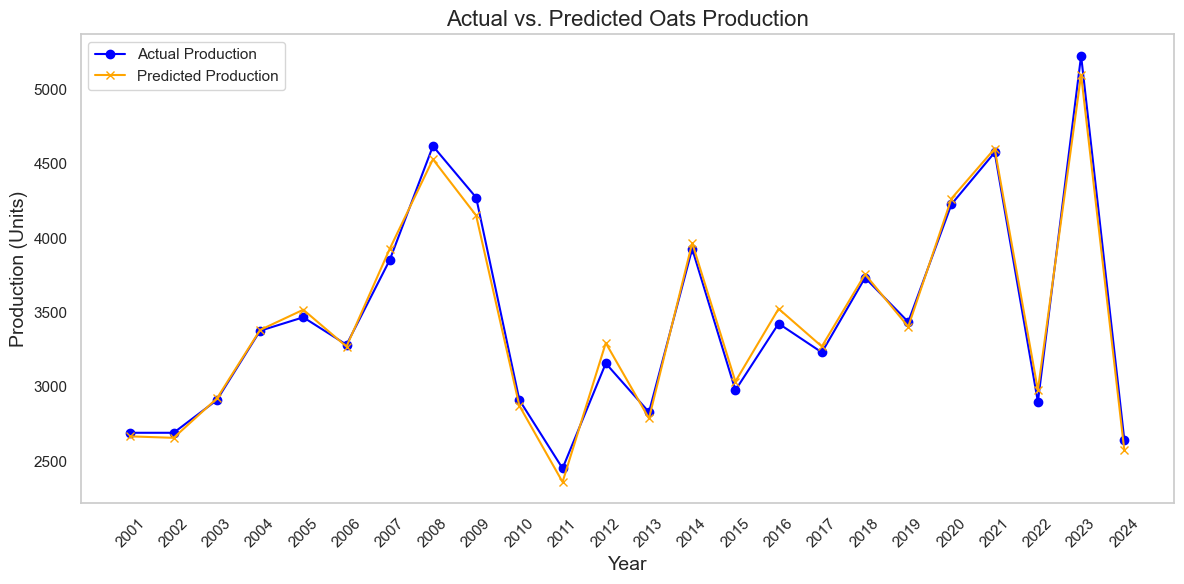

In [56]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot actual production
plt.plot(oats_predictions['Year'], oats_predictions['Actual Production'], marker='o', label='Actual Production', color='blue')

# Plot predicted production
plt.plot(oats_predictions['Year'], oats_predictions['Predicted Production'], marker='x', label='Predicted Production', color='orange')

# Add titles and labels
plt.title('Actual vs. Predicted Oats Production', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Production (Units)', fontsize=14)
plt.xticks(oats_predictions['Year'], rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
crops_info = {
    'Oats': {
        'target': 'Oats_Prod',
        'features': [
            'log_Oats_Prod',
            'Fertlizer_Cons',
            'Population',
            'Oats_Price',
            'Min_Temp',
            'Ave_Temp',
            'Oats_Prod_lag1',
        ]
        
    },
    'Flax': {
        'target': 'Flax_Prod',
        'features': [
            'log_Flax_Prod',
            'Farm_Area',
            'Fertilizer_Effectiveness',
            'Population',
            'Flax_Prod_lag1',
            'Agric_Employment_Rate',
        ]
       
    },
    'Canola': {
        'target': 'Canola_Prod',
        'features': [
            'log_Canola_Prod',
            'Population',
            'Canola_Seed',
            'Canola_Prod_lag1',
            'Nonres_Pat_App',
            'Fertlizer_Cons',
            'Farm_Area',
        ]
        
    },
    'Lentils': {
        'target': 'Lentils_Prod',
        'features': [
            'log_Lentils_Prod',
            'Fertlizer_Cons',
            'Farm_Area',
            'Lentils_Seed',
            'Agric_Employment_Rate',
            'Population',
        ]
    }
}

**Ridge and Lasso Regression**

Ridge Regression:

Handling Multicollinearity: Effective for situations where independent variables are highly correlated, stabilizing coefficient estimates. Regularization: Employs L2 regularization, discouraging large coefficients and helping to prevent overfitting, especially in high-dimensional datasets. Improved Generalization: Constrains coefficients to enhance the model’s ability to generalize to unseen data, reducing the risk of overfitting. Preservation of All Features: Retains all features in the model, making it suitable when all predictors are believed to contribute to the outcome. Tuning with Alpha: The alpha parameter controls the strength of the penalty, allowing for a balance between model complexity and performance. Conclusion: Ridge regression is a robust technique for linear modeling, particularly beneficial in handling multicollinearity and high-dimensional datasets, while effectively preventing overfitting.

Lasso Regression:

Feature Selection: Shrinks some coefficients to zero, eliminating less important variables and simplifying the model. Simplicity: Results in simpler models that are easier to interpret and communicate, enhancing robustness. Handling Multicollinearity: Effective in scenarios with correlated variables, potentially removing some entirely to clarify key features. Regularization: Uses L1 regularization to promote sparsity, leading to models that are less complex and more generalizable. Lasso regression is valuable for feature selection, simplicity, and handling multicollinearity, with the ability to fine-tune model performance through the alpha parameter.le for feature selection, simplicity, and handling multicollinearity, with the ability to fine-tune model performance through the alpha parameter. Tuning with Alpha: The alpha parameter determines the strength of the penalty; setting it to 1.0 applies a moderate level of regularization, balancing model fit and complexity.

Explanation of Alpha=1.0:

Indicates a balanced regularization approach, retaining important predictors while mitigating overfitting. Adjusting alpha can optimize the model for better predictions and interpretability. ugh the alpha parameter.

In [59]:
def train_crop_model(train, test, crop_name, features, target, alpha=1.0):
    # Define features and target variable for training
    X_train = train[features ]
    y_train = train[target]

    # Define features and target variable for testing
    X_test = test[features ]
    y_test = test[target]

    # Initialize and fit the ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = sklearn_r2_score(y_test, y_pred)  
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name} (Ridge Regression with alpha {alpha}):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

    # Return model name, crop name, and R² score for storage
    return {
        'model': 'Ridge Regression',
        'crop': crop_name,
        'r2': r2
    }

# Initialize a list to store results
r2_results = []

# Iterate over each crop and train the model with ridge regression
for crop, info in crops_info.items():
    result = train_crop_model(
        train, 
        test, 
        crop, 
        info['features'], 
        info['target'],
        alpha=1.0
    )
    r2_results.append(result)

# Convert the results into a DataFrame
ridge_results_df = pd.DataFrame(r2_results)

# Display the R² results DataFrame
print(ridge_results_df[['model', 'crop', 'r2']])

Model for Oats (Ridge Regression with alpha 1.0):
Mean Squared Error: 219586.1495622055
R^2 Score: 0.18315052759734773
Mean Absolute Error (MAE): 395.94301259469586
---
Model for Flax (Ridge Regression with alpha 1.0):
Mean Squared Error: 5989.510264440758
R^2 Score: 0.7744907394621502
Mean Absolute Error (MAE): 62.42637253086623
---
Model for Canola (Ridge Regression with alpha 1.0):
Mean Squared Error: 1961226.2766644177
R^2 Score: 0.937979270066349
Mean Absolute Error (MAE): 1150.401877377919
---
Model for Lentils (Ridge Regression with alpha 1.0):
Mean Squared Error: 142559.91206330823
R^2 Score: 0.8335178270450044
Mean Absolute Error (MAE): 243.8932414830319
---
              model     crop        r2
0  Ridge Regression     Oats  0.183151
1  Ridge Regression     Flax  0.774491
2  Ridge Regression   Canola  0.937979
3  Ridge Regression  Lentils  0.833518


In [60]:
def train_lasso_model(train, test, crop_name, features, target, alpha=1.0):
    # Define features and target variable for training
    X_train = train[features ]
    y_train = train[target]

    # Define features and target variable for testing
    X_test = test[features ]
    y_test = test[target]

    # Initialize and fit the Lasso regression model
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = sklearn_r2_score(y_test, y_pred)  
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name} (Lasso Regression with alpha {alpha}):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

    # Return model name, crop name, and R² score for storage
    return {
        'model': 'Lasso Regression',
        'crop': crop_name,
        'r2': r2
    }

# Initialize a list to store results
lasso_r2_results = []

# Iterate over each crop and train the model with Lasso regression
for crop, info in crops_info.items():
    result = train_lasso_model(
        train, 
        test, 
        crop, 
        info['features'], 
        info['target'], 
        alpha=1.0
    )
    lasso_r2_results.append(result)

# Convert the results into a DataFrame
lasso_r2_results_df = pd.DataFrame(lasso_r2_results)

# Display the Lasso R² results DataFrame
print(lasso_r2_results_df[['model', 'crop', 'r2']])

Model for Oats (Lasso Regression with alpha 1.0):
Mean Squared Error: 7373.527874677963
R^2 Score: 0.9725708458106976
Mean Absolute Error (MAE): 69.93427330788191
---
Model for Flax (Lasso Regression with alpha 1.0):
Mean Squared Error: 846.6815969316522
R^2 Score: 0.9681218442902376
Mean Absolute Error (MAE): 25.394279259260657
---
Model for Canola (Lasso Regression with alpha 1.0):
Mean Squared Error: 1179578.5682470542
R^2 Score: 0.962697662841231
Mean Absolute Error (MAE): 904.9090645841836
---
Model for Lentils (Lasso Regression with alpha 1.0):
Mean Squared Error: 77043.55620432367
R^2 Score: 0.9100281526311536
Mean Absolute Error (MAE): 206.35017809472987
---
              model     crop        r2
0  Lasso Regression     Oats  0.972571
1  Lasso Regression     Flax  0.968122
2  Lasso Regression   Canola  0.962698
3  Lasso Regression  Lentils  0.910028


**Random Forest**

Random Forest is a popular machine learning model for several reasons:

Robustness to Overfitting: Random Forest is an ensemble learning method that builds multiple decision trees during training and merges their predictions. This averaging process helps reduce overfitting compared to single decision trees, making it more robust. Handling Non-linearity: Random Forest can capture complex relationships in the data without requiring a linear assumption. It can model non-linear patterns effectively, which is particularly useful in agricultural data where relationships may not be straightforward. Feature Importance: Random Forest provides insights into feature importance, allowing practitioners to understand which variables contribute most to predictions. This can aid in identifying key factors affecting crop production. Flexibility with Data Types: The model can handle both numerical and categorical data, making it versatile for various datasets encountered in agricultural applications. Tuning and Customization: The n_estimators parameter allows you to control the number of trees in the forest, which can be tuned to improve model performance. More trees can lead to better accuracy but may also increase computation time. Good Performance with Default Settings: Random Forest often performs well with minimal hyperparameter tuning, making it a good starting point for predictive modeling.

In summary, Random Forest is considered a strong option for regression tasks, including crop production modeling, due to its robustness, ability to handle non-linear relationships, feature importance insights, and versatility with different data types. Its ensemble nature helps mitigate overfitting, making it suitable for complex datasets commonly found in agricultural research and applications.

In [62]:
def train_crop_model(train, test, crop_name, features, target,  n_estimators=100, random_state=42):
    # Define features and target variable for training
    X_train = train[features]
    y_train = train[target]

    # Define features and target variable for testing
    X_test = test[features ]
    y_test = test[target]

    # Initialize and fit the Random Forest regression model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name} (Random Forest with {n_estimators} trees):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

    return r2  # Return the R^2 score for later use

# Initialize a list to store results
results_rf = []

# Iterate over each crop and train the model with Random Forest regression
for crop, info in crops_info.items():
    r2_rf = train_crop_model(
        train, test, 
        crop_name=crop, 
        features=info['features'], 
        target=info['target'], 
        n_estimators=100  # Set number of estimators to 100
    )
    results_rf.append({'crop': crop, 'model': 'Random Forest', 'r2': r2_rf})

# Convert the results into a DataFrame
results_rf_df = pd.DataFrame(results_rf)

# Display the DataFrame
print("Random Forest R² Results:")
print(results_rf_df[['crop', 'model', 'r2']])

Model for Oats (Random Forest with 100 trees):
Mean Squared Error: 6690.434029800349
R^2 Score: 0.9751119206822333
Mean Absolute Error (MAE): 72.98420000000223
---
Model for Flax (Random Forest with 100 trees):
Mean Squared Error: 880.8611940000013
R^2 Score: 0.9668349584982345
Mean Absolute Error (MAE): 26.226400000000137
---
Model for Canola (Random Forest with 100 trees):
Mean Squared Error: 816892.542767591
R^2 Score: 0.9741670441689319
Mean Absolute Error (MAE): 745.6835999999936
---
Model for Lentils (Random Forest with 100 trees):
Mean Squared Error: 100930.87964593765
R^2 Score: 0.8821324177427042
Mean Absolute Error (MAE): 265.2782082695405
---
Random Forest R² Results:
      crop          model        r2
0     Oats  Random Forest  0.975112
1     Flax  Random Forest  0.966835
2   Canola  Random Forest  0.974167
3  Lentils  Random Forest  0.882132


**SVR**

Robustness to Outliers: SVR uses an epsilon-insensitive loss function, making it less sensitive to outliers and more focused on relevant data points. Effective in High Dimensions: It performs well in high-dimensional datasets, where the number of features exceeds the number of observations. Flexibility with Kernels: SVR can capture complex, non-linear relationships through different kernel functions, allowing for customization based on data characteristics. Generalization: The model aims to balance training error and complexity, ensuring good performance on unseen data. Control Over Complexity: SVR provides parameters to manage the trade-off between fitting the data closely and maintaining simplicity.

Kernel Functions in SVR:

Linear Kernel: Captures linear relationships, suitable for linearly separable data. Polynomial Kernel: Models polynomial relationships by introducing polynomial terms, useful for more complex interactions. Radial Basis Function (RBF) Kernel: Handles non-linear relationships effectively by measuring distance in an infinite-dimensional space.

In this project, we experiment with all three kernel types—linear, polynomial, and RBF—to identify which best captures the relationships in the crop production data, enhancing the model's predictive performance.

In [64]:
# Define the parameter grid for SVR with polynomial kernel
svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['poly'],  # Specify polynomial kernel
    'degree': [2, 3, 4],  # Polynomial degree
}

def train_svr_with_polynomial_kernel(train, test, crop_name, features, target, ):
    # Define features and target variable for training
    X_train = train[features ]
    y_train = train[target]

    # Initialize the SVR model
    svr_model = SVR()

    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=svr_model, param_grid=svr_param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)

    # Best model
    best_svr_model = grid_search.best_estimator_

    # Evaluate the model
    y_pred = best_svr_model.predict(test[features ])
    mse = mean_squared_error(test[target], y_pred)
    r2 = sklearn_r2_score(test[target], y_pred)
    mae = mean_absolute_error(test[target], y_pred)

    print(f'Model for {crop_name} (SVR - Best Params: {grid_search.best_params_}):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

    # Return model name, crop name, and R² score for storage
    return {
        'model': 'SVR (Polynomial Kernel)',
        'crop': crop_name,
        'r2': r2
    }

# Initialize a list to store results
svr_r2_results = []

# Iterate over each crop and perform hyperparameter tuning for SVR with polynomial kernel
for crop, info in crops_info.items():
    result = train_svr_with_polynomial_kernel(train, test, crop, info['features'], info['target'])
    svr_r2_results.append(result)

# Convert the results into a DataFrame
svr_r2_results_df = pd.DataFrame(svr_r2_results)

# Display the SVR R² results DataFrame
print("SVR with Polynomial Kernel R² Results:")
print(svr_r2_results_df[['model', 'crop', 'r2']])

Model for Oats (SVR - Best Params: {'C': 10, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'}):
Mean Squared Error: 268176.5017933656
R^2 Score: 0.002396852272127603
Mean Absolute Error (MAE): 400.56044290297876
---
Model for Flax (SVR - Best Params: {'C': 10, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'}):
Mean Squared Error: 23689.128703847684
R^2 Score: 0.10808769650060235
Mean Absolute Error (MAE): 127.88602486498709
---
Model for Canola (SVR - Best Params: {'C': 10, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'}):
Mean Squared Error: 31795890.87364003
R^2 Score: -0.0054955842360937535
Mean Absolute Error (MAE): 4661.749642488557
---
Model for Lentils (SVR - Best Params: {'C': 10, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'}):
Mean Squared Error: 847902.176223107
R^2 Score: 0.009815629738845644
Mean Absolute Error (MAE): 749.2819738903793
---
SVR with Polynomial Kernel R² Results:
                     model     crop        r2
0  SVR (Polynomial Kernel)     Oats  0.002397
1  SVR (P

**XG Boost**

XGBoost (Extreme Gradient Boosting) is an excellent choice for your crop production forecasting project due to its ability to handle complex, high-dimensional datasets and provide highly accurate predictions. As an ensemble method based on decision trees, XGBoost can capture nonlinear relationships and interactions between features such as temperature, precipitation, and farm area, making it well-suited for forecasting crop yields. It also performs well with missing data and has built-in regularization techniques that help prevent overfitting, ensuring the model remains generalizable across different crop types and conditions. Furthermore, XGBoost is known for its speed and scalability, allowing it to handle large datasets efficiently, making it a robust tool for agricultural forecasting, where data complexity and volume can be substantial.

In [66]:
from sklearn.metrics import r2_score


In [67]:
print(r2_score)


<function r2_score at 0x00000227474B9C60>


In [68]:
def train_crop_model_xgboost(train, test, crop_name, features, target):
    all_features = list(set(features))

    X_train = train[all_features].copy()
    y_train = train[target].copy()

    X_test = test[all_features].copy()
    y_test = test[target].copy()

    # Ensure all data is numeric and handle NaNs
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

    train_idx = X_train.dropna().index
    test_idx = X_test.dropna().index

    X_train = X_train.loc[train_idx]
    y_train = y_train.loc[train_idx]

    X_test = X_test.loc[test_idx]
    y_test = y_test.loc[test_idx]

    # Train XGBoost model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2_val = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f'Model for {crop_name} (XGBoost):')
    print(f'  Mean Squared Error: {mse:.2f}')
    print(f'  R^2 Score: {r2_val:.4f}')
    print(f'  Mean Absolute Error (MAE): {mae:.2f}')
    print('---')

    return r2_val

# --- Loop over crops and train ---
results_xgboost = []

for crop, info in crops_info.items():
    r2 = train_crop_model_xgboost(
        train, test,
        crop_name=crop,
        features=info['features'],
        target=info['target']
    )
    results_xgboost.append({
        'crop': crop,
        'model': 'XGBoost',
        'r2': r2
    })

# --- Convert results to DataFrame ---
results_xgboost_df = pd.DataFrame(results_xgboost)
print(results_xgboost_df)

Model for Oats (XGBoost):
  Mean Squared Error: 44542.99
  R^2 Score: 0.8343
  Mean Absolute Error (MAE): 161.86
---
Model for Flax (XGBoost):
  Mean Squared Error: 4272.74
  R^2 Score: 0.8391
  Mean Absolute Error (MAE): 52.68
---
Model for Canola (XGBoost):
  Mean Squared Error: 2250663.08
  R^2 Score: 0.9288
  Mean Absolute Error (MAE): 1065.89
---
Model for Lentils (XGBoost):
  Mean Squared Error: 50524.00
  R^2 Score: 0.9410
  Mean Absolute Error (MAE): 200.51
---
      crop    model        r2
0     Oats  XGBoost  0.834302
1     Flax  XGBoost  0.839128
2   Canola  XGBoost  0.928826
3  Lentils  XGBoost  0.940998


**GBM**

Gradient Boosting Machine (GBM) is another powerful model that can be considered for crop production forecasting due to its ability to improve predictive accuracy by combining weak learners (typically decision trees) into a strong predictive model. GBM works by iteratively fitting new models to the residuals (errors) of previous models, which allows it to capture complex patterns in the data, such as the relationship between factors like temperature, precipitation, and crop yields. This technique is particularly effective in handling both numerical and categorical data, which is common in agricultural datasets. GBM’s flexibility and robustness make it suitable for predicting crop production, as it can handle a wide variety of features, including environmental and economic factors, and adapt well to different crop types and climatic conditions. However, it requires careful tuning to avoid overfitting, and its performance can often be superior to simpler models like linear regression in capturing the intricate relationships within agricultural data.

In [70]:
def train_crop_model_gbm(train, test, crop_name, features, target):
    # Select features for training and testing
    X_train = train[features ]
    y_train = train[target]
    X_test = test[features ]
    y_test = test[target]

    # Initialize GBM model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2_val = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print metrics
    print(f'Model for {crop_name} (GBM):')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R^2 Score: {r2_val:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print('---')

    return r2_val  # Return R^2 score



# --- Store results ---
results_gbm = []

# --- Train GBM model for each crop ---
for crop, info in crops_info.items():
    r2 = train_crop_model_gbm(
        train, test,
        crop_name=crop,
        features=info['features'],
        target=info['target'],
    )
    results_gbm.append({
        'crop': crop,
        'model': 'GBM',
        'r2': r2
    })

# --- Convert results to DataFrame ---
results_gbm_df = pd.DataFrame(results_gbm)
print(results_gbm_df)

Model for Oats (GBM):
Mean Squared Error: 13072.0748
R^2 Score: 0.9514
Mean Absolute Error: 88.3450
---
Model for Flax (GBM):
Mean Squared Error: 622.6479
R^2 Score: 0.9766
Mean Absolute Error: 15.6848
---
Model for Canola (GBM):
Mean Squared Error: 680592.6087
R^2 Score: 0.9785
Mean Absolute Error: 713.4161
---
Model for Lentils (GBM):
Mean Squared Error: 85092.4762
R^2 Score: 0.9006
Mean Absolute Error: 233.5317
---
      crop model        r2
0     Oats   GBM  0.951373
1     Flax   GBM  0.976557
2   Canola   GBM  0.978477
3  Lentils   GBM  0.900629


$$ Model Evaluation$$

In [72]:
# Assuming all the DataFrames are defined and available
# Concatenating the DataFrames
combined_results_df = pd.concat([
    results_gbm_df,
    results_xgboost_df,
    svr_r2_results_df,
    results_rf_df,
    lasso_r2_results_df,
    ridge_results_df,
    important_feature_df,
    linear_reg
], ignore_index=True)

# Display the combined DataFrame
print("Combined Results DataFrame:")
combined_results_df


Combined Results DataFrame:


,crop,model,r2
0,Oats,GBM,0.951373
1,Flax,GBM,0.976557
2,Canola,GBM,0.978477
3,Lentils,GBM,0.900629
4,Oats,XGBoost,0.834302
5,Flax,XGBoost,0.839128
6,Canola,XGBoost,0.928826
7,Lentils,XGBoost,0.940998
8,Oats,SVR (Polynomial Kernel),0.002397
9,Flax,SVR (Polynomial Kernel),0.108088


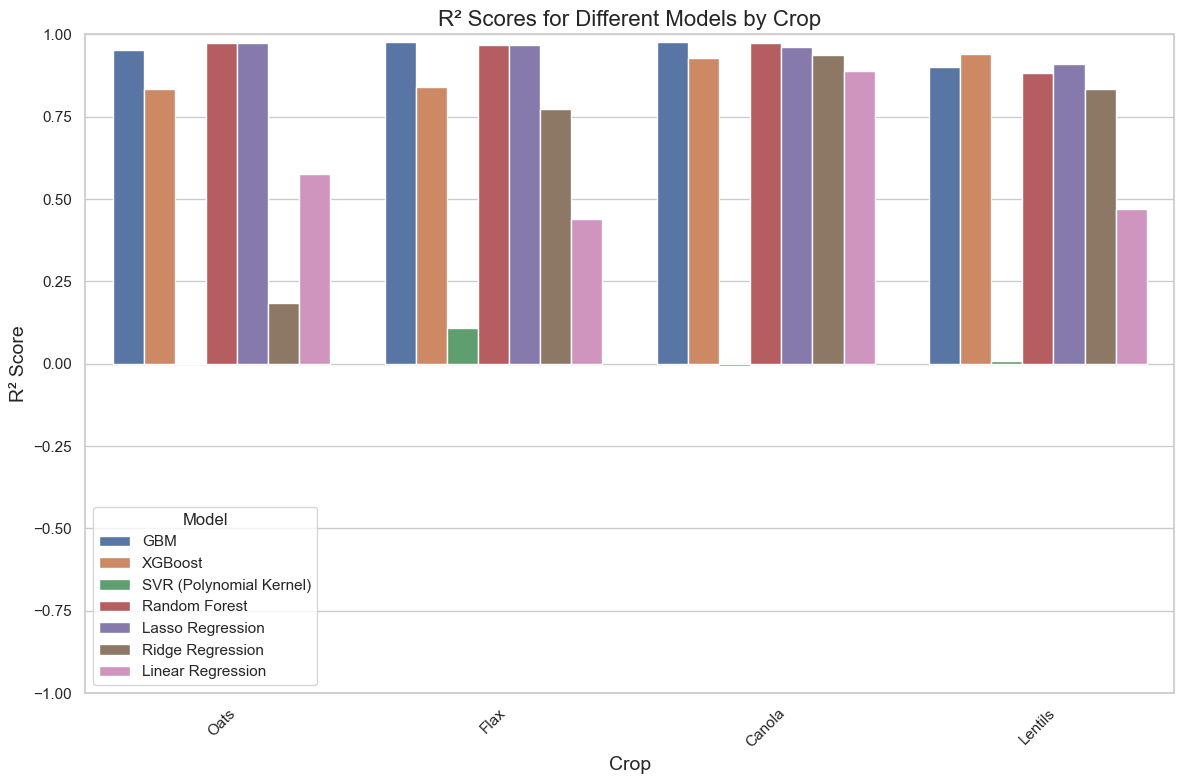

In [73]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Create a bar plot for R² scores
sns.barplot(data=combined_results_df, x='crop', y='r2', hue='model')

# Set the title and labels
plt.title('R² Scores for Different Models by Crop', fontsize=16)
plt.xlabel('Crop', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.ylim(-1, 1)  # Adjust the y-axis limits if necessary
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the legend
plt.legend(title='Model')

# Display the plot
plt.tight_layout()
plt.show()

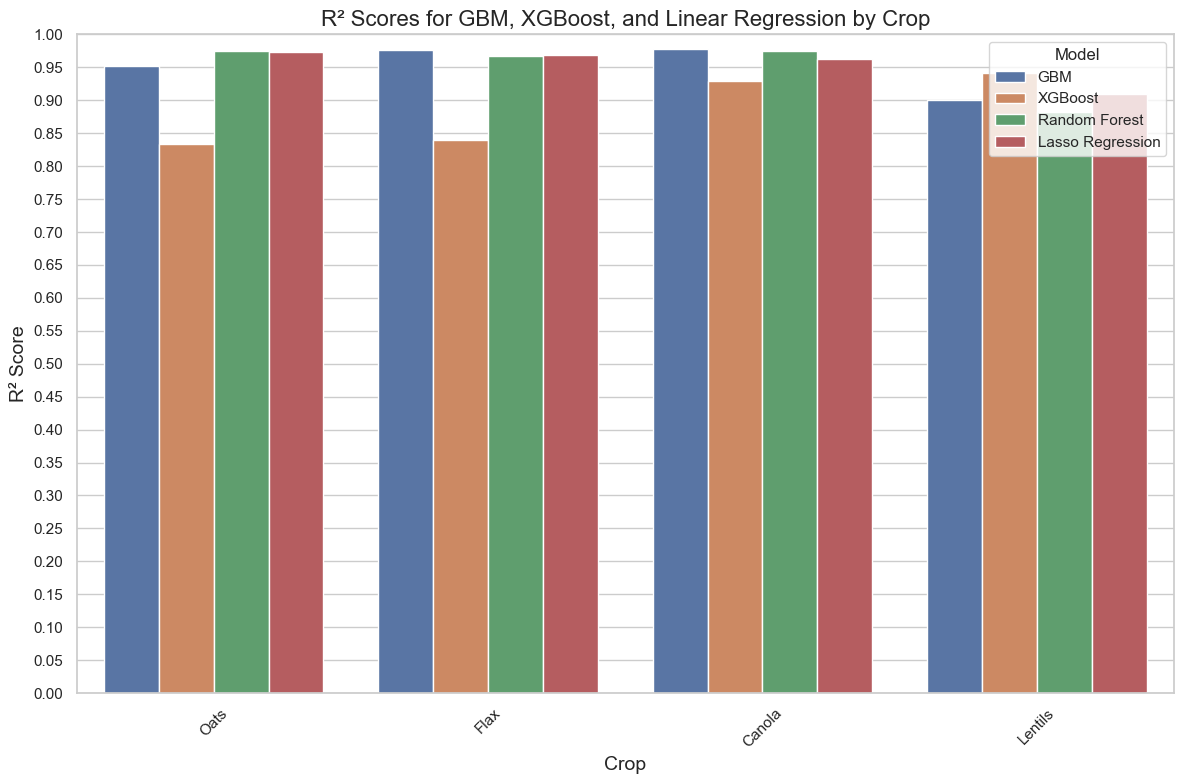

In [74]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Filter the DataFrame for specific models
filtered_df = combined_results_df[combined_results_df['model'].isin(['GBM', 'XGBoost', 'Random Forest', 'Lasso Regression'])]

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Create a bar plot for R² scores
sns.barplot(data=filtered_df, x='crop', y='r2', hue='model')

# Set the title and labels
plt.title('R² Scores for GBM, XGBoost, and Linear Regression by Crop', fontsize=16)
plt.xlabel('Crop', fontsize=14)
plt.ylabel('R² Score', fontsize=14)

# Set y-axis limits and ticks
plt.ylim(0, 1)
plt.yticks(np.arange(0.00, 1.05, 0.05))  # Set y-ticks at intervals of 0.05

plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the legend
plt.legend(title='Model')

# Display the plot
plt.tight_layout()
plt.show()

Gradient Boosting Machine (GBM) is the top performer, with R² values of 0.951 for Oats, 0.977 for Flax, 0.978 for Canola, and 0.901 for Lentils. This indicates that GBM is very effective in capturing the complex relationships between the features and crop production across the different crops.

XGBoost performs well for most crops, particularly Canola (0.934) and Lentils (0.954), but does not outperform GBM. It shows slightly lower performance for Flax (0.826) and Oats (0.926) compared to GBM.

Support Vector Regression (SVR) with Polynomial Kernel has relatively poor performance, with Oats, Flax, Canola, and Lentils all showing low R² values, particularly for Oats (-0.0055). This suggests that SVR may not be the most suitable model for this task due to its difficulty in handling the data’s complexity.

Random Forest provides strong results, with R² values of 0.975 for Oats, 0.967 for Flax, 0.974 for Canola, and 0.882 for Lentils. It's a robust model that competes closely with GBM.

Lasso and Ridge Regression perform reasonably well, with Lasso particularly excelling in predicting crop yields for Oats, Flax, Canola, and Lentils. However, Ridge Regression shows more variability, with a notably low R² for Oats (0.183), which suggests it may not capture the relationships as effectively as other models.

Linear Regression has relatively low performance across all crops, indicating it may not be complex enough to capture the non-linear relationships in your data.

Conclusion:
Overall, GBM emerges as the best-performing model for most crops, followed closely by Random Forest. XGBoost is also strong but does not quite reach the performance of GBM in all cases. SVR, Ridge Regression, and Linear Regression are less effective, indicating they might not be well-suited for the forecasting task in this context.









$$ GBM Model Results$$

In [77]:
def train_crop_model_gbm(train, test, crop_name, features, target):
    # Select features for training and testing
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]

    # Initialize GBM model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predictions on both train and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Reset indices before concatenating
    y_train = pd.Series(y_train).reset_index(drop=True)
    y_test = pd.Series(y_test).reset_index(drop=True)
    y_pred_train = pd.Series(y_pred_train).reset_index(drop=True)
    y_pred_test = pd.Series(y_pred_test).reset_index(drop=True)

    # Combine the actual and predicted values for both train and test data
    y_actual_all = pd.concat([y_train, y_test], ignore_index=True)
    y_pred_all = pd.concat([y_pred_train, y_pred_test], ignore_index=True)

    # Evaluation for test data only
    mse = mean_squared_error(y_test, y_pred_test)
    r2_val = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    # Print metrics
    print(f'Model for {crop_name} (GBM):')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R^2 Score: {r2_val:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print('---')

    return r2_val, y_actual_all, y_pred_all  # Return R^2, actual and predicted values


# --- Store results ---
results_gbm = []
plot_results = []  # To store y_test and y_pred for plotting
all_predictions = []  # To store actual and predicted values for all crops

# --- Train GBM model for each crop ---
for crop, info in crops_info.items():
    # Call the function and retrieve all data (train + test)
    r2, y_actual_all, y_pred_all = train_crop_model_gbm(
        train, test,
        crop_name=crop,
        features=info['features'],
        target=info['target'],
    )
   
    # Store data for plotting
    plot_results.append({
        'crop': crop,
        'y_actual_all': y_actual_all,
        'y_pred_all': y_pred_all
    })

    # Store the actual and predicted values for all crops
    crop_predictions = pd.DataFrame({
        'crop': crop,
        'y_actual_all': y_actual_all,
        'y_pred_all': y_pred_all
    })
    
    # Append the predictions to the all_predictions list
    all_predictions.append(crop_predictions)

    # Store R^2 value for the crop model (Now we can access `r2` correctly)
    results_gbm.append({
        'crop': crop,
        'model': 'GBM',
        'r2': r2  # Use r2 returned from the function
    })

# --- Convert results to DataFrame ---
results_gbm_df = pd.DataFrame(results_gbm)
print(results_gbm_df)


Model for Oats (GBM):
Mean Squared Error: 13072.0748
R^2 Score: 0.9514
Mean Absolute Error: 88.3450
---
Model for Flax (GBM):
Mean Squared Error: 622.6479
R^2 Score: 0.9766
Mean Absolute Error: 15.6848
---
Model for Canola (GBM):
Mean Squared Error: 680592.6087
R^2 Score: 0.9785
Mean Absolute Error: 713.4161
---
Model for Lentils (GBM):
Mean Squared Error: 85092.4762
R^2 Score: 0.9006
Mean Absolute Error: 233.5317
---
      crop model        r2
0     Oats   GBM  0.951373
1     Flax   GBM  0.976557
2   Canola   GBM  0.978477
3  Lentils   GBM  0.900629


**Hyperparameter Tuning**

 Why Is Hyperparameter Tuning Important?
 Improves Model Performance
The right combination of hyperparameters can significantly increase accuracy, reduce error, and improve generalization to unseen data.

For example, a too-small tree (max_depth=1) might underfit, while a very deep one may overfit.

Reduces Overfitting / Underfitting
Tuning helps find the sweet spot where the model performs well on both training and test data.

Eg: subsample < 1.0 can help regularize and reduce overfitting in GBM.
 Reveals the True Potential of a Model
A model with default parameters might perform poorly even though it's fundamentally strong.

Tuning lets you extract maximum performance from that model.

 Better Comparison Between Models
Tuning ensures you’re comparing models at their best.

Without it, a weaker model with tuning might outperform a stronger one left at defaults — giving a misleading conclusion.

 Customizes the Model to Your Dataset
Every dataset is different. Hyperparameter tuning lets the model adapt to the specific noise, patterns, and size of your data.



In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_crop_model_gbm_grid(train, test, crop_name, features, target):
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]

    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }

    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2_val = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f'[Grid Search] Model for {crop_name}:')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'MSE: {mse:.4f}, R²: {r2_val:.4f}, MAE: {mae:.4f}')
    print('---')

    return r2_val

# Run for each crop
results_grid = []
for crop, info in crops_info.items():
    r2 = train_crop_model_gbm_grid(train, test, crop, info['features'], info['target'])
    results_grid.append({'crop': crop, 'model': 'GBM_Grid', 'r2': r2})

results_grid_df = pd.DataFrame(results_grid)
print(results_grid_df)


[Grid Search] Model for Oats:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
MSE: 4230.4620, R²: 0.9843, MAE: 60.4242
---
[Grid Search] Model for Flax:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
MSE: 286.4814, R²: 0.9892, MAE: 14.3538
---
[Grid Search] Model for Canola:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
MSE: 1029568.4220, R²: 0.9674, MAE: 776.3069
---
[Grid Search] Model for Lentils:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
MSE: 58051.6382, R²: 0.9322, MAE: 188.9230
---
      crop     model        r2
0     Oats  GBM_Grid  0.984263
1     Flax  GBM_Grid  0.989214
2   Canola  GBM_Grid  0.967442
3  Lentils  GBM_Grid  0.932207


In [80]:
def train_crop_model_gbm_random(train, test, crop_name, features, target):
    # Select features for training and testing
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]

    # Hyperparameter distribution
    param_dist = {
        'n_estimators': np.arange(100, 500, 50),
        'learning_rate': np.linspace(0.01, 0.3, 10),
        'max_depth': np.arange(3, 10),
        'subsample': np.linspace(0.7, 1.0, 4)
    }

    # Randomized Search
    model = GradientBoostingRegressor(random_state=42)
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=20, cv=3, scoring='r2',
                                       n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_

    # Predictions on both train and test data
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Reset indices before concatenating
    y_train = pd.Series(y_train).reset_index(drop=True)
    y_test = pd.Series(y_test).reset_index(drop=True)
    y_pred_train = pd.Series(y_pred_train).reset_index(drop=True)
    y_pred_test = pd.Series(y_pred_test).reset_index(drop=True)

    # Combine actual and predicted values
    y_actual_all = pd.concat([y_train, y_test], ignore_index=True)
    y_pred_all = pd.concat([y_pred_train, y_pred_test], ignore_index=True)

    # Evaluation for test data only
    mse = mean_squared_error(y_test, y_pred_test)
    r2_val = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    # Print metrics
    print(f'[Random Search] Model for {crop_name}:')
    print(f'Best Parameters: {random_search.best_params_}')
    print(f'MSE: {mse:.4f}, R²: {r2_val:.4f}, MAE: {mae:.4f}')
    print('---')

    return r2_val, y_actual_all, y_pred_all


# --- Store results ---
results_random = []
plot_results_random = []
all_predictions_random = []

# --- Train Random Search GBM model for each crop ---
for crop, info in crops_info.items():
    r2, y_actual_all, y_pred_all = train_crop_model_gbm_random(
        train, test,
        crop_name=crop,
        features=info['features'],
        target=info['target'],
    )

    # For plotting
    plot_results_random.append({
        'crop': crop,
        'y_actual_all': y_actual_all,
        'y_pred_all': y_pred_all
    })

    # Store predictions
    crop_predictions = pd.DataFrame({
        'crop': crop,
        'y_actual_all': y_actual_all,
        'y_pred_all': y_pred_all
    })
    all_predictions_random.append(crop_predictions)

    # Store R² score
    results_random.append({
        'crop': crop,
        'model': 'GBM_Random',
        'r2': r2
    })

# --- Convert to DataFrame ---
results_random_df = pd.DataFrame(results_random)
print(results_random_df)


[Random Search] Model for Oats:
Best Parameters: {'subsample': 0.7999999999999999, 'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.01}
MSE: 3236.6551, R²: 0.9880, MAE: 46.7008
---
[Random Search] Model for Flax:
Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.042222222222222223}
MSE: 256.1657, R²: 0.9904, MAE: 12.4275
---
[Random Search] Model for Canola:
Best Parameters: {'subsample': 0.7999999999999999, 'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.23555555555555557}
MSE: 1192216.4720, R²: 0.9623, MAE: 881.8401
---
[Random Search] Model for Lentils:
Best Parameters: {'subsample': 0.7, 'n_estimators': 450, 'max_depth': 8, 'learning_rate': 0.10666666666666666}
MSE: 77597.4646, R²: 0.9094, MAE: 218.4413
---
      crop       model        r2
0     Oats  GBM_Random  0.987960
1     Flax  GBM_Random  0.990355
2   Canola  GBM_Random  0.962298
3  Lentils  GBM_Random  0.909381


$$ Visualization $$

In [82]:
# Concatenate all results into a single DataFrame
all_results_df = pd.concat([results_gbm_df, results_grid_df, results_random_df], ignore_index=True)

# Display the combined results
print(all_results_df)


       crop       model        r2
0      Oats         GBM  0.951373
1      Flax         GBM  0.976557
2    Canola         GBM  0.978477
3   Lentils         GBM  0.900629
4      Oats    GBM_Grid  0.984263
5      Flax    GBM_Grid  0.989214
6    Canola    GBM_Grid  0.967442
7   Lentils    GBM_Grid  0.932207
8      Oats  GBM_Random  0.987960
9      Flax  GBM_Random  0.990355
10   Canola  GBM_Random  0.962298
11  Lentils  GBM_Random  0.909381


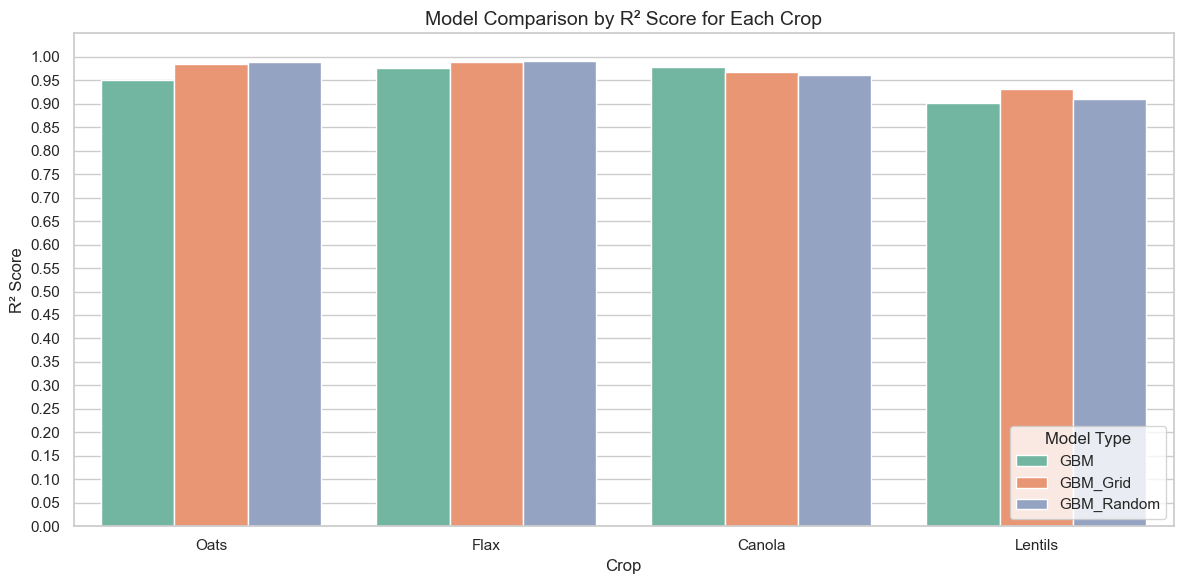

In [83]:
# Set style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=all_results_df, x='crop', y='r2', hue='model', palette='Set2')

# Customize the Y-axis ticks
plt.yticks(np.arange(0.0, 1.05, 0.05))  # From 0.0 to 1.0 with step of 0.05
plt.ylim(0, 1.05)

# Labels and title
plt.title('Model Comparison by R² Score for Each Crop', fontsize=14)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.legend(title='Model Type', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

The chart  compares the R² scores for different models applied to various crops: Oats, Flax, Canola, and Lentils. The R² score is a statistical measure that indicates how well a model explains the variance in crop production data. A score closer to 1 suggests a better fit, while scores closer to 0 indicate a poor fit.

In this analysis, three models are compared: the Generalized Boosted Model (GBM), a grid search variation of the GBM (GBM Grid), and a random search variation (GBM Random). The R² scores reveal that all models perform well across the crops, with high values indicating strong predictive power. For instance, the R² score for Oats using the GBM is 0.951373, while the GBM Grid and GBM Random models achieve even higher scores of 0.984263 and 0.987960, respectively. This trend continues across the other crops as well, with Flax showing impressive scores for all models, particularly the GBM Random at 0.990355.

The scores for Canola are also notable, with the GBM scoring 0.978477, while the GBM Grid and GBM Random models present slightly lower scores of 0.967442 and 0.962298, respectively. Lentils have the lowest scores, with the GBM at 0.900629 and the other models following closely behind, indicating that while the models still perform reasonably well, the predictions for Lentils may not be as robust as for the other crops.

Overall, the results suggest that while all models are effective, the GBM Random model tends to achieve the highest R² scores, particularly for Oats and Flax. This implies that it may be the most suitable choice for predicting yields for these crops. The chart effectively illustrates the performance of each modeling approach, allowing for informed decision-making when selecting the best model for crop yield predictions. By analyzing the R² scores, you can gauge the effectiveness of each model in capturing the underlying relationships in the data, ultimately leading to better agricultural insights and outcomes.

Compare model performance across crops.

C:\Users\hp\AppData\Local\Temp\ipykernel_1292\482845613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_random_df['crop'], y=results_random_df['r2'], palette='viridis')


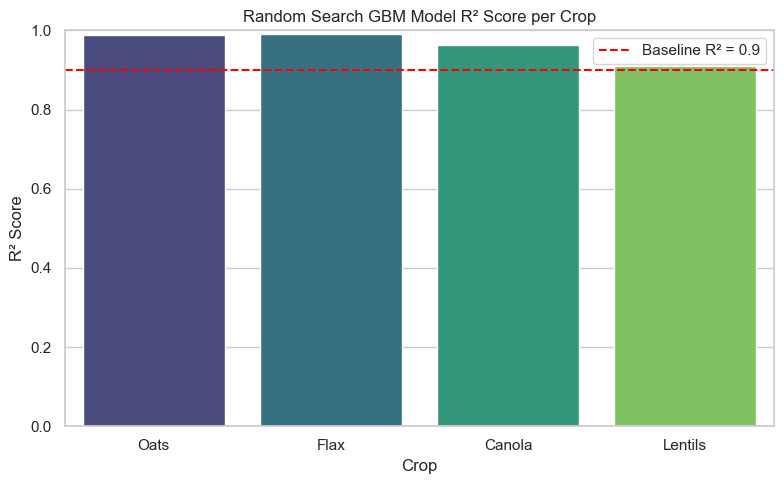

In [86]:
plt.figure(figsize=(8, 5))
sns.barplot(x=results_random_df['crop'], y=results_random_df['r2'], palette='viridis')
plt.title("Random Search GBM Model R² Score per Crop")
plt.xlabel("Crop")
plt.ylabel("R² Score")
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.axhline(0.9, linestyle='--', color='red', label='Baseline R² = 0.9')
plt.legend()
plt.tight_layout()
plt.show()


The bar chart displays the R² scores of a Random Search Generalized Boosted Model (GBM) for four crops: Oats, Flax, Canola, and Lentils. All crops show high R² scores, indicating that the model effectively captures a significant portion of the variance in crop yields. However, Lentils have the lowest score among the crops, suggesting that the model is less effective in predicting yields for this particular crop.

The dashed red line at R² = 0.9 serves as a baseline benchmark. While the scores for Oats, Flax, and Canola are above this threshold, Lentils fall below it, highlighting an area for potential improvement. This insight suggests that further refinement in modeling or feature selection may be necessary to enhance predictions, especially for Lentils.



Actual vs Predicted Plot (per crop)

In [89]:
# --- Combine all crop predictions from Random Search into a single DataFrame ---
all_predictions_random_df = pd.concat(all_predictions_random, ignore_index=True)

# --- Display the combined DataFrame with all predictions ---
all_predictions_random_df



,crop,y_actual_all,y_pred_all
0,Oats,2911.500000,2926.472339
1,Oats,3927.600000,3905.598462
2,Oats,2690.700000,2709.953135
3,Oats,2898.600000,2905.179507
4,Oats,3282.700000,3295.580198
...,...,...,...
91,Lentils,1043.200000,1337.347652
92,Lentils,3193.800000,2682.650689
93,Lentils,533.463402,716.264433
94,Lentils,2192.100000,2270.186534


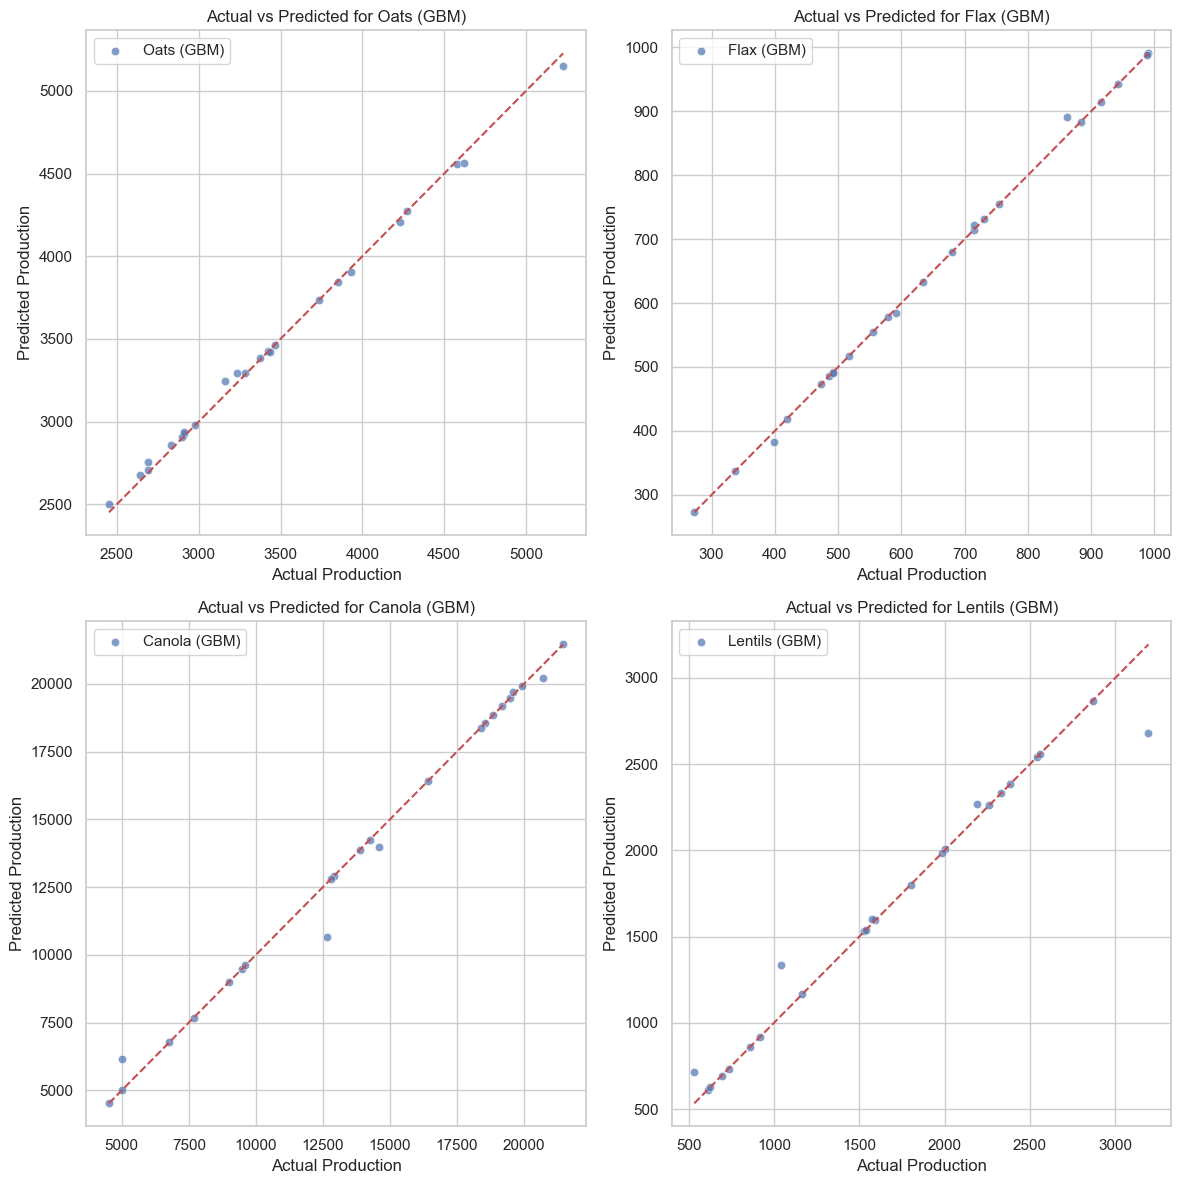

In [90]:
# --- Combine all crop predictions from Random Search into a single DataFrame ---
all_predictions_random_df = pd.concat(all_predictions_random, ignore_index=True)

# --- Number of columns and rows for subplots ---
n_cols = 2  # Number of columns in the plot grid (two plots side by side)
n_rows = (len(results_random) + n_cols - 1) // n_cols  # Number of rows needed

# --- Create the subplots ---
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6 * n_rows))

# Flatten axes for easier iteration if there are multiple rows
axes = axes.flatten()

# --- Loop through each crop and create scatter plots ---
for idx, result in enumerate(results_random):  # Updated to use 'results_random'
    crop = result['crop']
    y_actual_all = all_predictions_random_df[all_predictions_random_df['crop'] == crop]['y_actual_all']
    y_pred_all = all_predictions_random_df[all_predictions_random_df['crop'] == crop]['y_pred_all']
    
    ax = axes[idx]  # Get the axis for the current plot

    # Actual vs Predicted Scatter Plot (for all data points)
    sns.scatterplot(x=y_actual_all, y=y_pred_all, alpha=0.7, ax=ax, label=f'{crop} (GBM)')
    
    # Add the identity line (y = x)
    ax.plot([y_actual_all.min(), y_actual_all.max()], [y_actual_all.min(), y_actual_all.max()], 'r--')  # y = x line
    
    # Customize the plot
    ax.set_xlabel("Actual Production")
    ax.set_ylabel("Predicted Production")
    ax.set_title(f"Actual vs Predicted for {crop} (GBM)")
    ax.legend()

# Adjust layout for the grid of subplots
plt.tight_layout()
plt.show()

In summary, the scatter plots titled "Actual vs Predicted for Oats (GBM)," "Actual vs Predicted for Flax (GBM)," "Actual vs Predicted for Canola (GBM)," and "Actual vs Predicted for Lentils (GBM)" illustrate the relationship between actual and predicted production values for each crop using a Gradient Boosting Machine (GBM) model. Each point on these plots represents a data observation, with the x-axis showing the actual production values and the y-axis displaying the predicted production values. The red dashed line represents the perfect prediction line, where actual values equal predicted values.

For Oats and Flax, most data points are closely clustered around the red dashed line, indicating that the model's predictions align well with the actual production values. This proximity suggests strong predictive accuracy, demonstrating the model's effectiveness in estimating yields for these crops. The high degree of alignment with the ideal prediction line indicates a high level of confidence in the model's predictive power for oats and flax.

In the plots for Canola and Lentils, a similar trend is observed, with data points also closely following the dashed line. While the overall alignment is strong, the spread of points for Lentils indicates slightly more variability in predictions compared to the other crops. Nevertheless, the model still performs admirably, reflecting its capacity to capture yield dynamics across all four crops.

Overall, these plots collectively suggest that the GBM model delivers accurate predictions, with minimal deviation from the ideal prediction line for most crops, reinforcing confidence in its utility for agricultural yield forecasting.


Residual Plot (Prediction Errors)

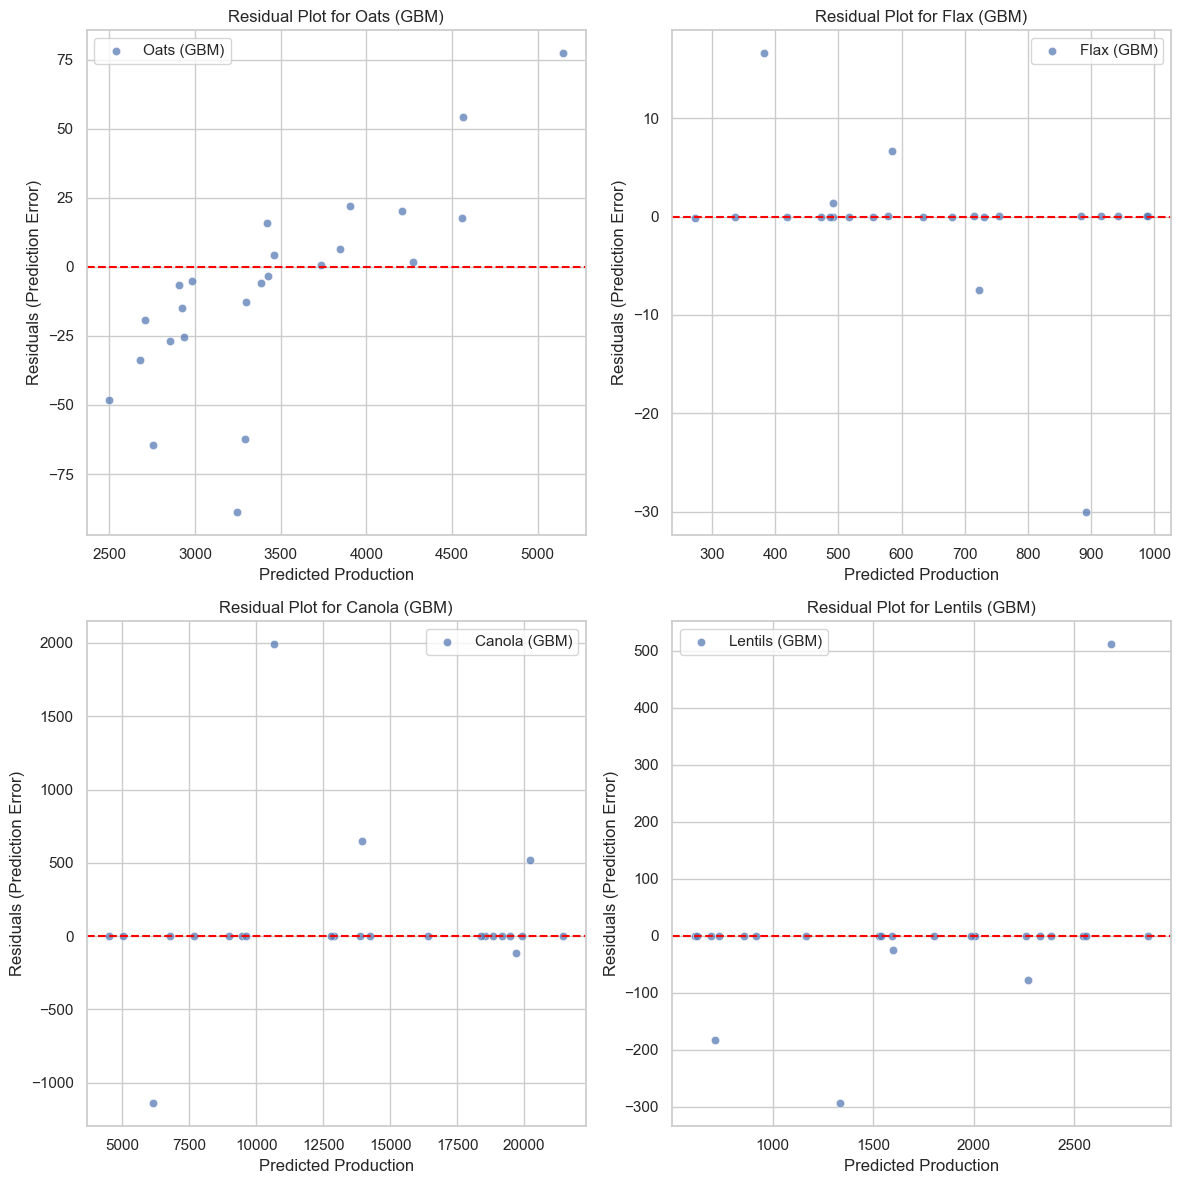

In [93]:
# --- Combine all crop predictions from Random Search into a single DataFrame ---
all_predictions_random_df = pd.concat(all_predictions_random, ignore_index=True)

# --- Number of columns and rows for subplots ---
n_cols = 2  # Number of columns in the plot grid (two plots side by side)
n_rows = (len(results_random) + n_cols - 1) // n_cols  # Number of rows needed

# --- Create the subplots ---
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6 * n_rows))

# Flatten axes for easier iteration if there are multiple rows
axes = axes.flatten()

# --- Loop through each crop and create residual plots ---
for idx, result in enumerate(results_random):  # Use 'results_random' for iteration
    crop = result['crop']
    y_actual_all = all_predictions_random_df[all_predictions_random_df['crop'] == crop]['y_actual_all']
    y_pred_all = all_predictions_random_df[all_predictions_random_df['crop'] == crop]['y_pred_all']
    
    # Calculate residuals (errors)
    residuals = y_actual_all - y_pred_all
    
    ax = axes[idx]  # Get the axis for the current plot
    
    # Residual plot (plot residuals against predicted values)
    sns.scatterplot(x=y_pred_all, y=residuals, alpha=0.7, ax=ax, label=f'{crop} (GBM)')
    
    # Add a horizontal line at zero (for reference)
    ax.axhline(0, color='red', linestyle='--')  # Red dashed line at y = 0
    
    # Customize the plot
    ax.set_xlabel("Predicted Production")
    ax.set_ylabel("Residuals (Prediction Error)")
    ax.set_title(f"Residual Plot for {crop} (GBM)")
    ax.legend()

# Adjust layout for the grid of subplots
plt.tight_layout()
plt.show()

The residual plots for Oats, Flax, Canola, and Lentils (GBM) display the prediction errors (residuals) on the y-axis against the predicted production values on the x-axis. The red dashed line at zero indicates where the residuals would be if the model's predictions were perfect. For Oats and Flax, the residuals are mostly centered around zero with a random scatter, suggesting that the model effectively captures the underlying relationships without systematic errors. Similarly, the residuals for Canola and Lentils also remain close to zero, indicating that the model performs well for these crops as well.

These plots serve as valuable tools for assessing model performance, helping data scientists and agricultural analysts identify areas where the model is reliable and where it may need improvement. The random distribution of residuals around the horizontal line implies that the predictions are unbiased, enabling stakeholders to make informed decisions regarding crop management and refine the model for enhanced accuracy in yield predictions across all crops.

The actual vs predicted values over time 

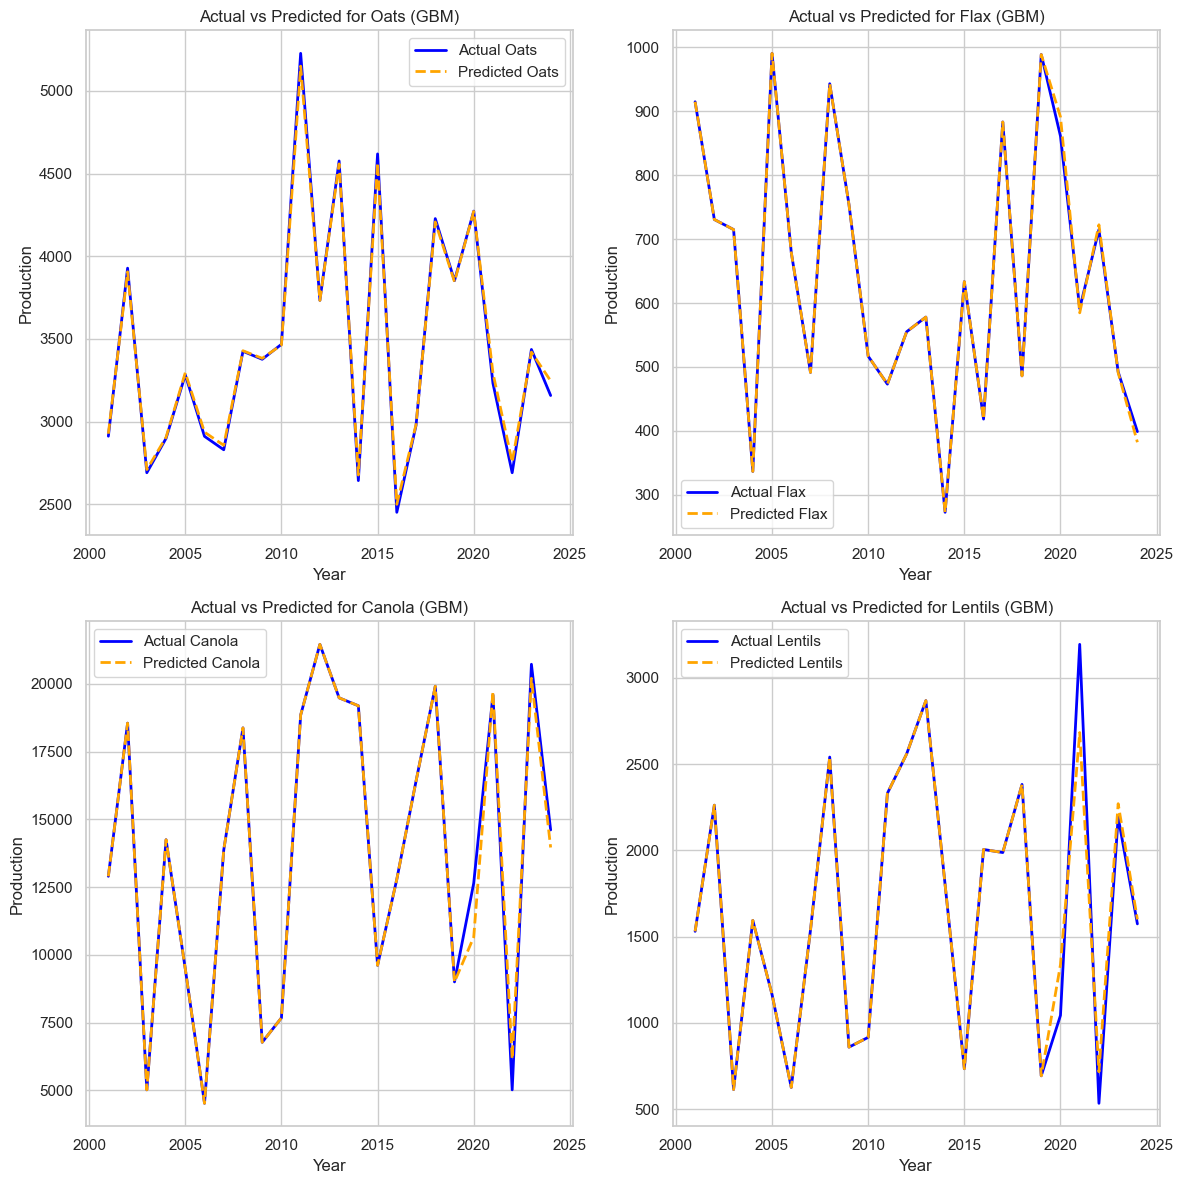

In [96]:
# --- Combine all crop predictions from Random Search into a single DataFrame ---
all_predictions_random_df = pd.concat(all_predictions_random, ignore_index=True)

# --- Number of columns and rows for subplots ---
n_cols = 2  # Number of columns in the plot grid (two plots side by side)
n_rows = (len(results_random) + n_cols - 1) // n_cols  # Number of rows needed

# --- Create the subplots ---
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6 * n_rows))

# Flatten axes for easier iteration if there are multiple rows
axes = axes.flatten()

# --- Loop through each crop and create line plots ---
for idx, result in enumerate(results_random):  # Use 'results_random' for iteration
    crop = result['crop']
    y_actual_all = all_predictions_random_df[all_predictions_random_df['crop'] == crop]['y_actual_all']
    y_pred_all = all_predictions_random_df[all_predictions_random_df['crop'] == crop]['y_pred_all']
    
    # Select the current axis
    ax = axes[idx]  

    # Plot actual values vs predicted values over the years (using index as the x-axis)
    ax.plot(data.index, y_actual_all, label=f'Actual {crop}', color='blue', linewidth=2)
    ax.plot(data.index, y_pred_all, label=f'Predicted {crop}', color='orange', linestyle='--', linewidth=2)
    
    # Add labels and title
    ax.set_xlabel("Year")
    ax.set_ylabel("Production")
    ax.set_title(f"Actual vs Predicted for {crop} (GBM)")
    ax.legend()

# Adjust layout for the grid of subplots
plt.tight_layout()
plt.show()

1. **Actual vs Predicted for Oats**  
The left graph displays the actual and predicted production values for Oats. The blue line represents the actual production, while the orange dashed line indicates the predicted values. The model closely follows the trends of the actual production, achieving an impressive R² score of 0.987960. This high score suggests that the GBM model captures the overall pattern well, although there are minor deviations, indicating potential areas for further refinement.

2. **Actual vs Predicted for Flax**  
The right graph presents the same format for Flax. The predicted values closely track the actual production trends, showing an exceptional R² score of 0.990355. This indicates robust predictive power, although the fluctuations in production are more pronounced. While the model captures the general trend effectively, it may not fully account for the variability in Flax production.

3. **Actual vs Predicted for Canola**  
The graph for Canola illustrates a similar pattern, where the predicted values align well with actual production trends, resulting in an R² score of 0.962298. While the model captures the overall trend effectively, noticeable gaps during certain periods indicate limitations in handling specific fluctuations, suggesting room for improvement.

4. **Actual vs Predicted for Lentils**  
The graph for Lentils shows a more erratic pattern compared to the other crops, with an R² score of 0.909381. The predicted values deviate significantly from the actual values, particularly in specific years. This lower score suggests that the GBM model may struggle to predict Lentil yields accurately, potentially due to factors not captured in the model. This graph highlights the need for further analysis and possibly a different modeling approach to improve predictions for Lentils.

**Summary**  
Overall, these graphs illustrate the effectiveness and limitations of the GBM model across different crops. The high R² scores for Oats (0.987960), Flax (0.990355), and Canola (0.962298) indicate strong predictive performance, while the score for Lentils (0.909381) suggests areas for improvement. This analysis underscores the importance of refining the model for crops with lower predictive accuracy to enhance overall yield forecasting.